In [303]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from kverse.assets.pool import *
from kverse.assets.pool.base_pool_proj import read_base_pool_proj
from kverse.assets.pool.comp_changeouts import read_cc
from kverse.assets.pool.blocked_lanes import read_blocked_lanes
from kverse.assets.pool.component_allocation import ComponentAllocation
from datetime import datetime, timedelta
import pandas as pd
import re
import numpy as np
import pickle
import seaborn as sns
import matplotlib as mpl

# Jonatahan para todasd las alertas temprandas en condicion de garantía favor agregarme en copia.
import matplotlib.pyplot as plt


from extraction import *











The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [295]:
reso_df = (
    pd.read_excel("../../../DATA/RESO/SALIDA/enmendado_os.xlsx")
    .dropna(subset=["REPORTE_TECNICO_INI"])
    .reset_index(drop=True)
)

with open("../../../DATA/RESO/SALIDA/ini_tables.pickle", "rb") as f:
    ini_tables = pickle.load(f)
with open("../../../DATA/RESO/SALIDA/fin_tables.pickle", "rb") as f:
    fin_tables = pickle.load(f)


reso_df

,changeout_date,component_hours_cc,equipo,USO,os_sap,bajas_horas,os_reso,faena,component_serial,reception_date,component_hours,REPORTE_TECNICO_INI,REPORTE_TECNICO_FIN,SERIE,MODELO,HORÓMETRO,N° PARTE
0,2021-03-15,274.0,878.0,0.01370,18107849.0,1.0,13010921,ESCONDIDA,EE04070186,2021-04-06,274,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30101,960E-2,274.0,GE0017
1,NaT,NaN,NaN,NaN,18095180.0,NaN,14103044,RADOMIRO TOMIC,EE04070186,2019-04-29,20.433,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30447,930E-3,20433.0,GE0017
2,NaT,NaN,NaN,NaN,18105638.0,NaN,14116130,ESCONDIDA,EE04070186,2020-11-27,8.499,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30052,960E-2,8499.0,GE0017
3,NaT,NaN,NaN,NaN,18119693.0,NaN,14135762,ESCONDIDA,EE04070186,2023-04-10,6.103,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30089,960E-2,6103.0,GE0017
4,NaT,NaN,NaN,NaN,18126164.0,NaN,14144503,ESCONDIDA,EE04070186,2024-04-24,4.872,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30104,960E-2,4872.0,GE0017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2022-04-16,19905.0,869.0,0.99525,18114689.0,0.0,14128240,ESCONDIDA,EN12090076,2022-04-26,19.905,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30089,960E-2,19905.0,XA4146
98,NaT,NaN,NaN,NaN,18122519.0,NaN,14139785,ESCONDIDA,EN12090076,2023-10-13,7.568,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30076,960E-2,7568.0,XA4146
99,2020-11-04,25181.0,866.0,1.25905,18105458.0,0.0,14115857,ESCONDIDA,EN12100083,2020-11-13,25.181,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30081,960E-2,25181.0,XA4146
100,NaT,NaN,NaN,NaN,18117416.0,NaN,14132243,SIERRA GORDA,EN12100083,2022-11-10,11308,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A31489,930E-4SE,11308.0,XA4146


In [301]:
organize_table_names(reso_df, ini_tables, fin_tables)

,changeout_date,component_hours_cc,equipo,USO,os_sap,bajas_horas,os_reso,faena,component_serial,reception_date,component_hours,REPORTE_TECNICO_INI,REPORTE_TECNICO_FIN,SERIE,MODELO,HORÓMETRO,N° PARTE,table_name,_merge
0,NaT,NaN,NaN,NaN,NaN,NaN,14105458,NaN,EG07080103,NaT,NaN,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30545,930E-4,14060452.0,GE0017,Metrología de carbones,both
1,NaT,NaN,NaN,NaN,18088878.0,NaN,14094512,ESCONDIDA,EN12090007,2018-05-18 10:15:52.400,4388,/home/cecilvega/PycharmProjects/kohub/kverse/a...,NaN,A30517,930E-4,4388.0,XA4146,Metrología de carbones,left_only
2,NaT,NaN,NaN,NaN,18126164.0,NaN,14144503,ESCONDIDA,EE04070186,2024-04-24 00:00:00.000,4.872,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30104,960E-2,4872.0,GE0017,Metrología de carbones,both
3,NaT,NaN,NaN,NaN,NaN,NaN,13009560,NaN,EE12040115,NaT,NaN,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30077,960E-2,599.0,XA4146,Metrología de carbones,both
4,NaT,NaN,NaN,NaN,NaN,NaN,14113571,NaN,EE14010117,NaT,NaN,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30080,960E-2,7434.0,XA4146SERV,Metrología de carbones,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2023-09-13,25334.0,868.0,1.2667,18122067.0,0.0,14139265,ESCONDIDA,EE18060073,2023-09-26 00:00:00.000,25.334,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30083,960E-2,25334.0,XA4146SERV,Test de resistencia de aislación (500V),left_only
2280,NaT,NaN,NaN,NaN,18122519.0,NaN,14139785,ESCONDIDA,EN12090076,2023-10-13 00:00:00.000,7.568,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30076,960E-2,7568.0,XA4146,Test de resistencia de aislación (500V),left_only
2281,NaT,NaN,NaN,NaN,18113178.0,NaN,14124639,ESCONDIDA,EE06050269,2022-01-27 00:00:00.000,14.716,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30098,960E-2,14716.0,GE0017,Test de resistencia de aislación (500V),left_only
2282,NaT,NaN,NaN,NaN,NaN,NaN,14106359,NaN,EE14091188,NaT,NaN,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30106,960E-2,24700.0,XA4146,Test de resistencia de aislación (500V),left_only


In [302]:
reso_df

,changeout_date,component_hours_cc,equipo,USO,os_sap,bajas_horas,os_reso,faena,component_serial,reception_date,component_hours,REPORTE_TECNICO_INI,REPORTE_TECNICO_FIN,SERIE,MODELO,HORÓMETRO,N° PARTE
0,2021-03-15,274.0,878.0,0.01370,18107849.0,1.0,13010921,ESCONDIDA,EE04070186,2021-04-06,274,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30101,960E-2,274.0,GE0017
1,NaT,NaN,NaN,NaN,18095180.0,NaN,14103044,RADOMIRO TOMIC,EE04070186,2019-04-29,20.433,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30447,930E-3,20433.0,GE0017
2,NaT,NaN,NaN,NaN,18105638.0,NaN,14116130,ESCONDIDA,EE04070186,2020-11-27,8.499,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30052,960E-2,8499.0,GE0017
3,NaT,NaN,NaN,NaN,18119693.0,NaN,14135762,ESCONDIDA,EE04070186,2023-04-10,6.103,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30089,960E-2,6103.0,GE0017
4,NaT,NaN,NaN,NaN,18126164.0,NaN,14144503,ESCONDIDA,EE04070186,2024-04-24,4.872,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30104,960E-2,4872.0,GE0017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2022-04-16,19905.0,869.0,0.99525,18114689.0,0.0,14128240,ESCONDIDA,EN12090076,2022-04-26,19.905,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30089,960E-2,19905.0,XA4146
98,NaT,NaN,NaN,NaN,18122519.0,NaN,14139785,ESCONDIDA,EN12090076,2023-10-13,7.568,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30076,960E-2,7568.0,XA4146
99,2020-11-04,25181.0,866.0,1.25905,18105458.0,0.0,14115857,ESCONDIDA,EN12100083,2020-11-13,25.181,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30081,960E-2,25181.0,XA4146
100,NaT,NaN,NaN,NaN,18117416.0,NaN,14132243,SIERRA GORDA,EN12100083,2022-11-10,11308,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A31489,930E-4SE,11308.0,XA4146


In [296]:
dataframes = []
for table_name in table_names:

    break

In [299]:
# [v['table_name']ini_tables]

[{'table_name': 'Holgura entre carcasa y álabes',
  'file_type': 'REPORTE_TECNICO_INI',
  'file_path': '/home/cecilvega/PycharmProjects/kohub/kverse/assets/reso/../../../DATA/RESO/COMP/EE04070186/13010921_195794_INI_APRO.pdf',
  'raw_data': [['1.- Holgura entre carcasa y álabes', '', '', '', ''],
   ['',
    'Posición a 0º [pulg]',
    'Posición a 45º [pulg]',
    'Posición a 90º [pulg]',
    'Observaciones'],
   ['Medición del lado\nconmutador',
    '0,03',
    '0,03',
    '0,03',
    'Dentro de medida'],
   ['Medición del lado de\nbobinas',
    '0,03',
    '0,03',
    '0,03',
    'Dentro de medida']]},
 {'table_name': 'Test de resistencia de aislación (500V)',
  'file_type': 'REPORTE_TECNICO_INI',
  'file_path': '/home/cecilvega/PycharmProjects/kohub/kverse/assets/reso/../../../DATA/RESO/COMP/EE04070186/13010921_195794_INI_APRO.pdf',
  'raw_data': [['2.- Test de resistencia de aislación (500V)', '', ''],
   ['', 'Resultado del test [Mohm]', 'Observaciones'],
   ['Bobinas del estator'

In [253]:
dataframes = []
for table_name in table_names:

    print(f"Tabla a analizar: {table_name}")
    ini_df = compile_table(
        tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
    )
    no_fin_table = [
        "Metrología del conmutador de la armadura",
        "Test de resistencia de aislación (1000V) a porta carbones",
        "Test de resistencia de aislación (500V)",
    ]
    if table_name not in no_fin_table:
        fin_df = compile_table(
            tables=fin_tables, table_name=table_name, file_type="REPORTE_TECNICO_FIN"
        )

    # Existen iniciales y finales
    df = pd.concat([ini_df]).drop(columns=["file_path"])
    # print(table_name)
    # print(ini_df.columns.to_list())
    # print(ini_df.dtypes)
    df = df.pipe(reshape_data).drop(columns=["file_type"])
    dataframes.append(df)
    # print(df.columns)

Tabla a analizar: Tensión de resortes de los porta carbones
Tabla a analizar: Metrología de carbones
Tabla a analizar: Test de resistencia de aislación (1000V) a porta carbones
Tabla a analizar: Test de resistencia de aislación (500V)
Tabla a analizar: Pruebas resistencia ohmica
Tabla a analizar: Pruebas resistencia de aislación
Tabla a analizar: Pruebas Hipot DC
Tabla a analizar: Metrología del conmutador de la armadura


In [277]:
def merge_dataframes(dataframes_list):
    result = dataframes_list[0]
    for df in dataframes_list[1:]:
        result = result.merge(df, on=["os_reso"], how="outer", suffixes=("", "_drop"))
        result = result.loc[:, ~result.columns.str.endswith("_drop")]
    return result.fillna("")


df = merge_dataframes(dataframes)
df = pd.merge(
    df,
    reso_df[["os_reso", "faena", "component_hours"]].assign(
        component_hours=lambda x: x["component_hours"]
        .str.replace(".", "")
        .str.replace(",", "")
        .str.replace("SIN INFORMACIÓN", "-1")
        .fillna(-1)
        .astype(int)
    ),
    how="left",
    on="os_reso",
)

In [290]:
df.to_excel("../../../DATA/RESO/SALIDA/extract.xlsx")

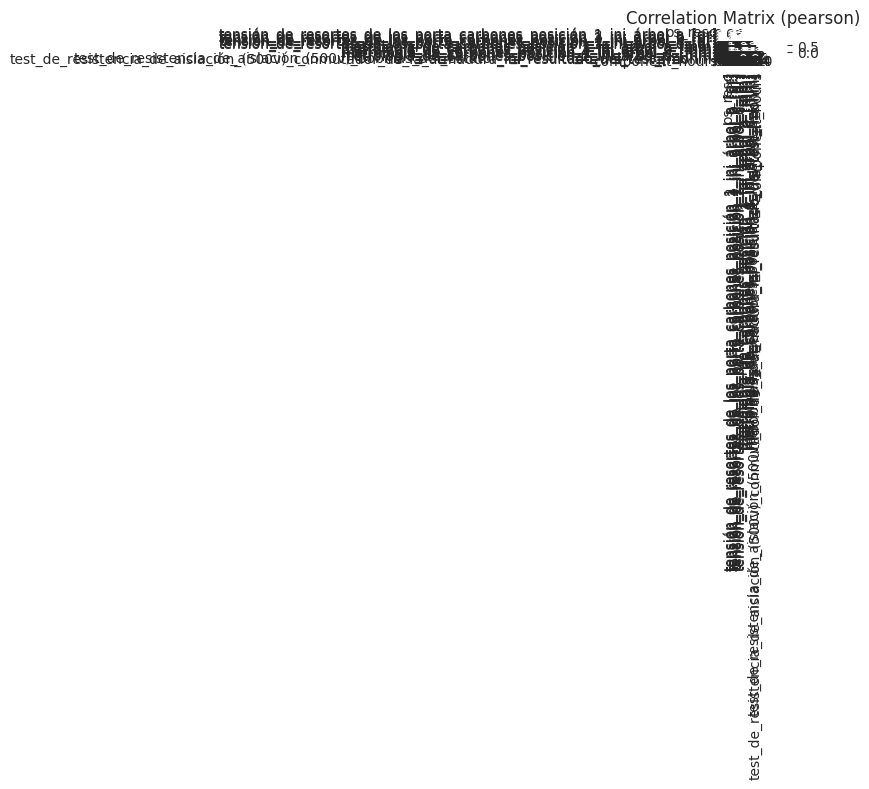

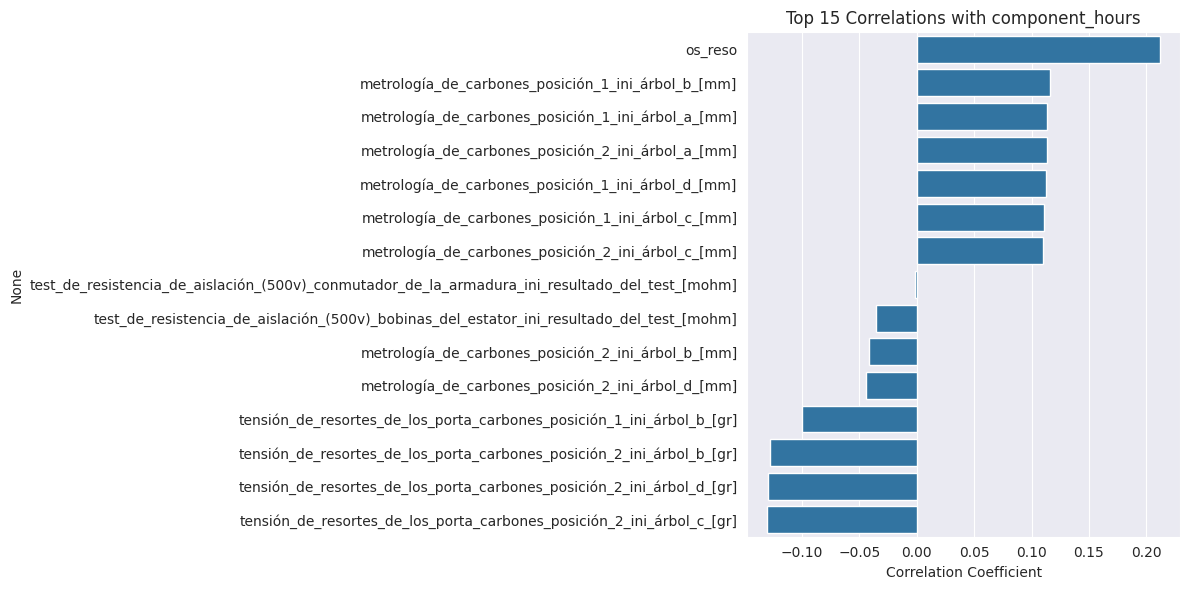

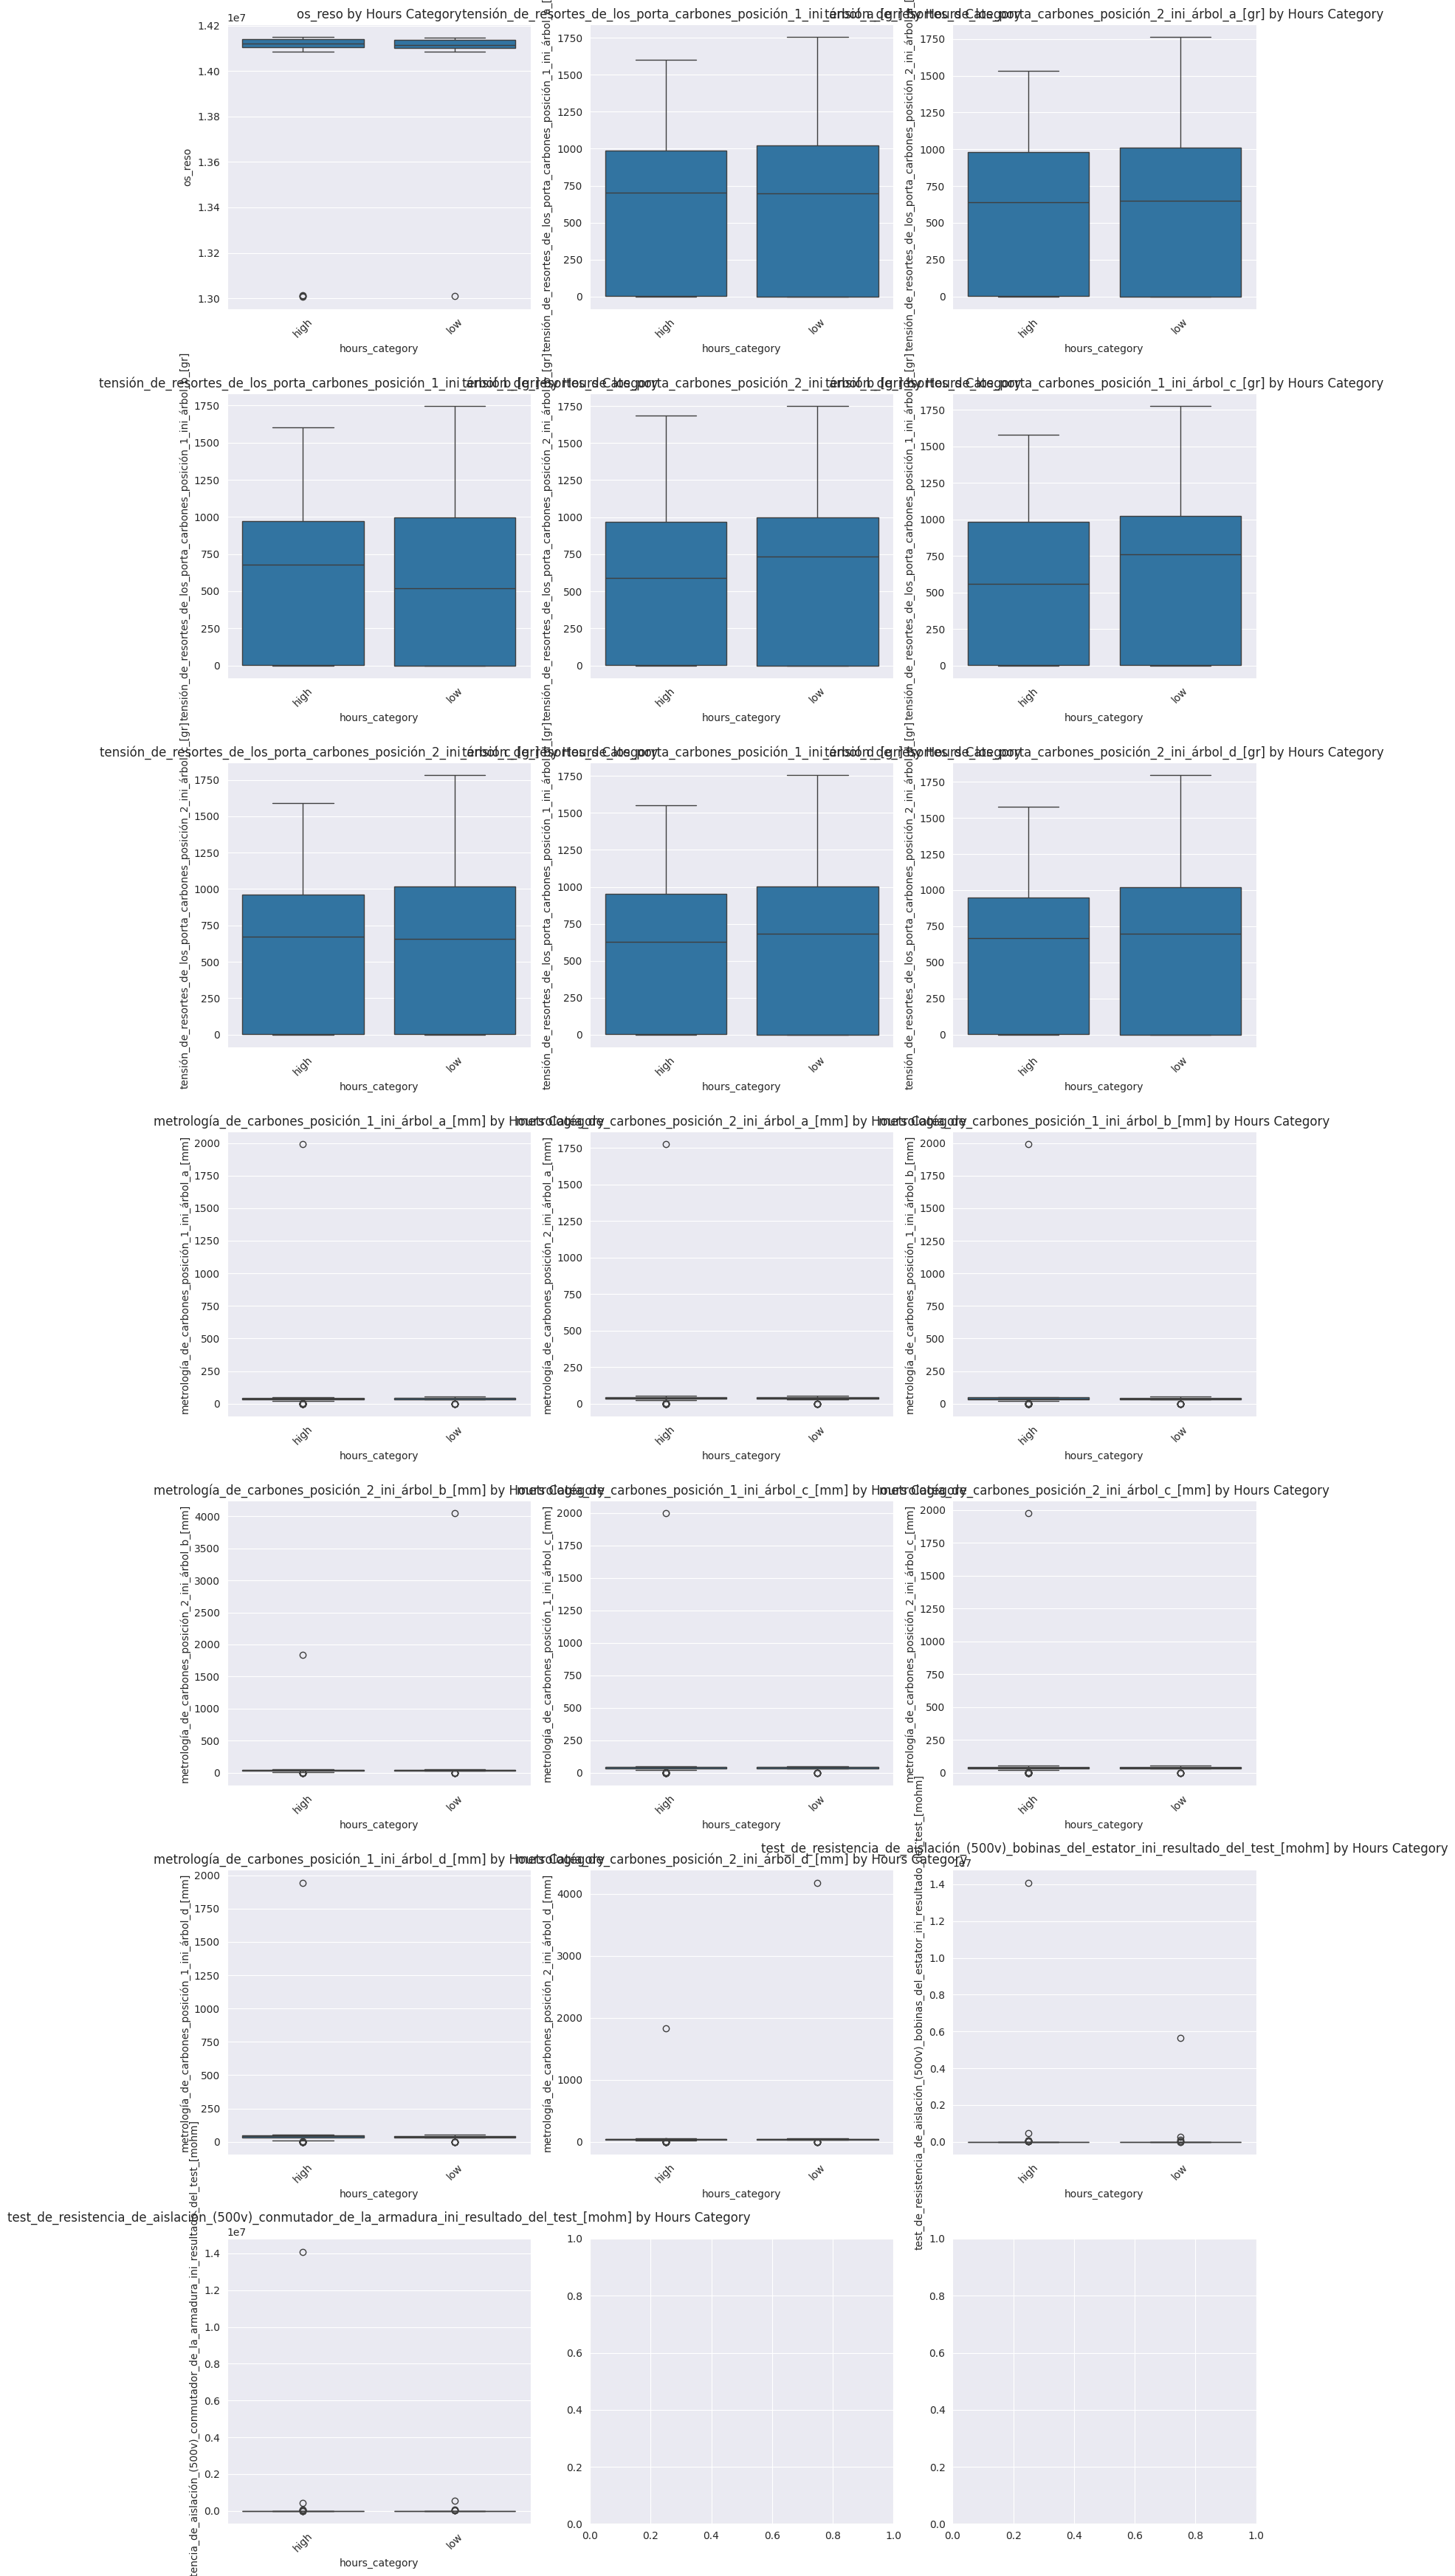

In [282]:
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency


def plot_correlations(df, method="pearson", figsize=(12, 8)):
    # Get numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate correlations
    corr = numeric_df.corr(method=method)

    # Set up mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Draw heatmap with mask and correct aspect ratio
    sns.heatmap(
        corr,
        mask=mask,
        center=0,
        cmap="coolwarm",
        square=True,
        linewidths=0.5,
        annot=True,
        fmt=".2f",
        cbar_kws={"shrink": 0.5},
    )

    plt.title(f"Correlation Matrix ({method})")
    plt.tight_layout()
    plt.show()


def plot_specific_correlations(df, target_col="component_hours", top_n=15):
    # Get numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate correlations with target
    correlations = numeric_df.corr()[target_col].sort_values(ascending=False)

    # Select top N correlations (excluding self-correlation)
    top_correlations = correlations[1 : top_n + 1]

    # Create bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_correlations.values, y=top_correlations.index)
    plt.title(f"Top {top_n} Correlations with {target_col}")
    plt.xlabel("Correlation Coefficient")
    plt.tight_layout()
    plt.show()


# Statistical visualization for low vs high hours
def plot_low_vs_high_comparison(df, numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns

    hours_threshold = df["component_hours"].quantile(0.05)
    df["hours_category"] = df["component_hours"].apply(
        lambda x: "low" if x <= hours_threshold else "high"
    )

    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols):
        if col != "component_hours":
            sns.boxplot(x="hours_category", y=col, data=df, ax=axes[idx])
            axes[idx].set_title(f"{col} by Hours Category")
            axes[idx].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


# Usage:
# Basic correlation heatmap
plot_correlations(df)
# Specific correlations with component_hours
plot_specific_correlations(df, target_col="component_hours")

plot_low_vs_high_comparison(df)

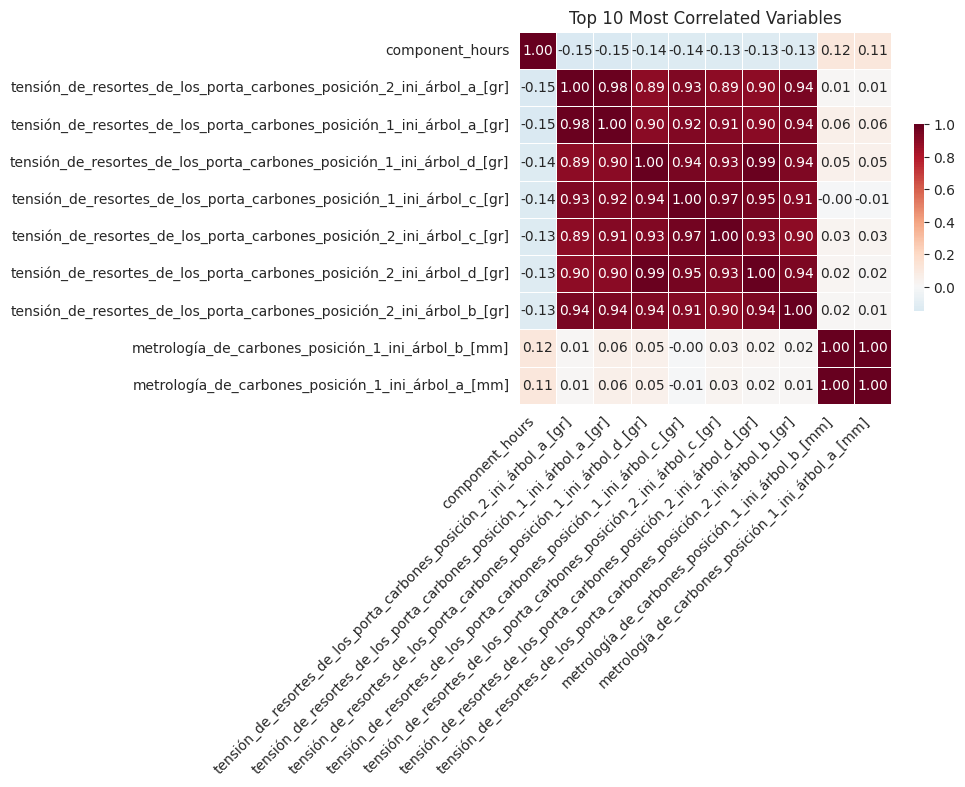

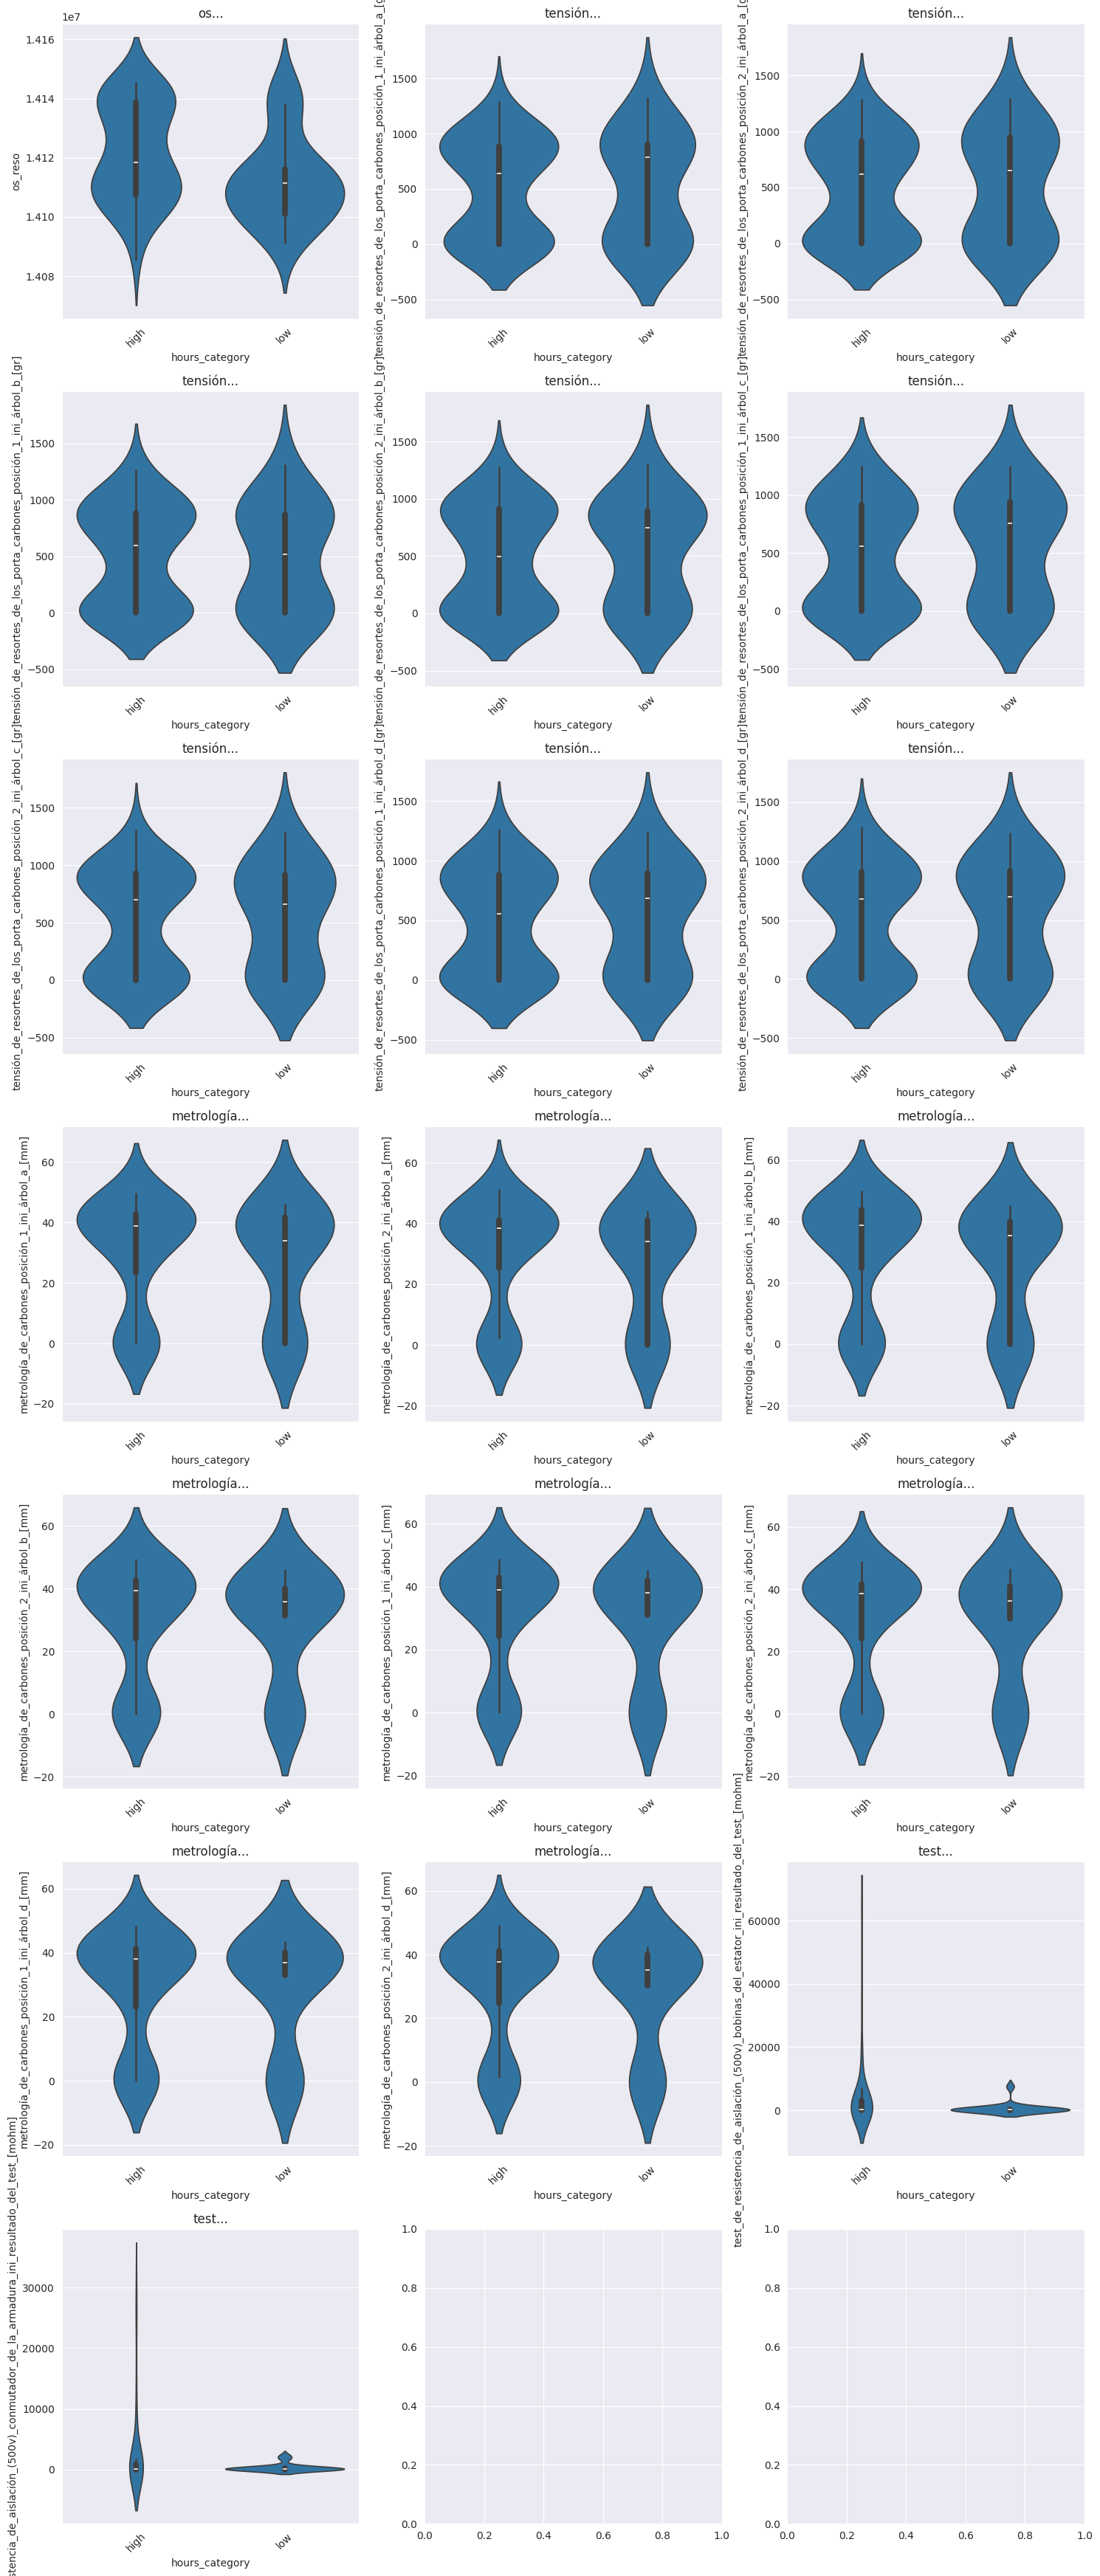


Variable mapping:
var_0: os_reso
var_1: tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_a_[gr]
var_2: tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_a_[gr]
var_3: tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_b_[gr]
var_4: tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_b_[gr]
var_5: tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_c_[gr]
var_6: tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_c_[gr]
var_7: tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_d_[gr]
var_8: tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_d_[gr]
var_9: metrología_de_carbones_posición_1_ini_árbol_a_[mm]
var_10: metrología_de_carbones_posición_2_ini_árbol_a_[mm]
var_11: metrología_de_carbones_posición_1_ini_árbol_b_[mm]
var_12: metrología_de_carbones_posición_2_ini_árbol_b_[mm]
var_13: metrología_de_carbones_posición_1_ini_árbol_c_[mm]
var_14: metrología_de_carbones_posición_2_ini_árbol_c_[m

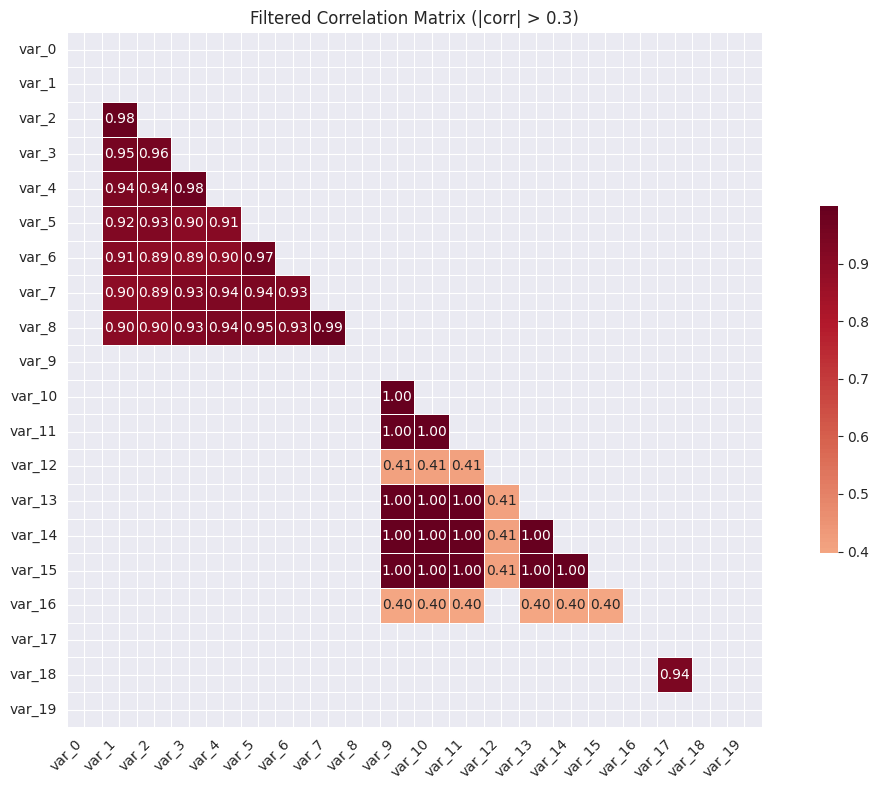

In [286]:
def plot_correlations_improved(df, threshold=0.3, figsize=(12, 8)):
    # Get numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate correlations
    corr = numeric_df.corr()

    # Filter correlations by threshold
    corr_filtered = corr.where(abs(corr) > threshold)

    # Create shorter names for variables
    rename_dict = {col: f"var_{i}" for i, col in enumerate(corr.columns)}
    corr_renamed = corr_filtered.rename(columns=rename_dict, index=rename_dict)

    # Set up mask for upper triangle
    mask = np.triu(np.ones_like(corr_renamed, dtype=bool))

    # Plot
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_renamed,
        mask=mask,
        center=0,
        cmap="RdBu_r",
        square=True,
        linewidths=0.5,
        annot=True,
        fmt=".2f",
        cbar_kws={"shrink": 0.5},
    )

    plt.title("Filtered Correlation Matrix (|corr| > {})".format(threshold))
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Print variable mapping
    print("\nVariable mapping:")
    for orig, new in rename_dict.items():
        print(f"{new}: {orig}")


def plot_low_vs_high_comparison_no_outliers(
    df, numeric_cols=None, quantile_range=(0.05, 0.95)
):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Create hours category
    hours_threshold = df["component_hours"].quantile(0.05)
    df["hours_category"] = df["component_hours"].apply(
        lambda x: "low" if x <= hours_threshold else "high"
    )

    # Remove outliers for each numeric column
    df_clean = df.copy()
    for col in numeric_cols:
        if col != "component_hours":
            lower = df[col].quantile(quantile_range[0])
            upper = df[col].quantile(quantile_range[1])
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    # Create subplot grid
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols):
        if col != "component_hours":
            # Create violin plot with box plot inside
            sns.violinplot(
                x="hours_category", y=col, data=df_clean, inner="box", ax=axes[idx]
            )
            axes[idx].set_title(f'{col.split("_")[0]}...')  # Shortened title
            axes[idx].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


# Alternative: Focus on most important correlations
def plot_top_correlations_matrix(df, n_vars=10):
    # Get numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate correlations with component_hours
    correlations = abs(numeric_df.corr()["component_hours"]).sort_values(
        ascending=False
    )

    # Select top N most correlated variables
    top_vars = correlations.head(n_vars).index

    # Create correlation matrix for top variables
    corr_matrix = numeric_df[top_vars].corr()

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        center=0,
        cmap="RdBu_r",
        square=True,
        linewidths=0.5,
        annot=True,
        fmt=".2f",
        cbar_kws={"shrink": 0.5},
    )

    plt.title(f"Top {n_vars} Most Correlated Variables")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()


plot_top_correlations_matrix(df.drop(columns=["os_reso"]), 10)
plot_low_vs_high_comparison_no_outliers(df)
plot_correlations_improved(df)

In [279]:
df.columns

Index(['os_reso',
       'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_a_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_a_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_b_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_b_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_c_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_c_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_d_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_d_[gr]',
       'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_acción_a_tomar',
       ...
       'metrología_del_conmutador_de_la_armadura_posición_a_ini_acción_a_tomar',
       'metrología_del_conmutador_de_la_armadura_posición_b_ini_acción_a_tomar',
       'metrología_del_conmutador_de_la_armadura_posición_c_ini_acción_a_tomar',
      

In [265]:
reso_df[["os_reso", "faena", "component_hours"]]

,os_reso,faena,component_hours
0,13010921,ESCONDIDA,274
1,14103044,RADOMIRO TOMIC,20.433
2,14116130,ESCONDIDA,8.499
3,14135762,ESCONDIDA,6.103
4,14144503,ESCONDIDA,4.872
...,...,...,...
97,14128240,ESCONDIDA,19.905
98,14139785,ESCONDIDA,7.568
99,14115857,ESCONDIDA,25.181
100,14132243,SIERRA GORDA,11308


In [262]:
df

,os_reso,tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_a_[gr],tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_a_[gr],tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_b_[gr],tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_b_[gr],tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_c_[gr],tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_c_[gr],tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_d_[gr],tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_d_[gr],tensión_de_resortes_de_los_porta_carbones_posición_1_ini_acción_a_tomar,...,"metrología_del_conmutador_de_la_armadura_posición_""b""_ini_acción_a_tomar","metrología_del_conmutador_de_la_armadura_posición_""c""_ini_acción_a_tomar",metrología_del_conmutador_de_la_armadura_posición_a_ini_acción_a_tomar,metrología_del_conmutador_de_la_armadura_posición_b_ini_acción_a_tomar,metrología_del_conmutador_de_la_armadura_posición_c_ini_acción_a_tomar,metrología_del_conmutador_de_la_armadura_metrología_conmutador_ini_codigo_del_instrumento,"metrología_del_conmutador_de_la_armadura_posición_""a""_ini_código_del_instrumento","metrología_del_conmutador_de_la_armadura_posición_""b""_ini_código_del_instrumento","metrología_del_conmutador_de_la_armadura_posición_""c""_ini_código_del_instrumento",metrología_del_conmutador_de_la_armadura_metrología_conmutador_ini_fecha_de_calibración
0,13008283,1.545,1.520,1.423,1.452,1.602,1.544,1.524,1.445,Reutilizar,...,Reutilizar,Reutilizar,,,,,No aplico desarme\ncompleto,No aplico desarme\ncompleto,No aplico desarme\ncompleto,
1,13009560,1.395,1.464,1.665,1.310,1.465,1.505,1.440,1.440,Reuso,...,Reparación,Reparación,,,,,,,,
2,13010921,1135.000,1055.000,755.000,830.000,555.000,0.000,1130.000,1075.000,Reemplazar,...,,,Reemplazar,Reemplazar,Reemplazar,,,,,
3,13011520,1500.000,1535.000,1550.000,1525.000,1525.000,1495.000,1550.000,1545.000,Reutilizar,...,,,Reparar,Reparar,Reparar,,,,,
4,13012584,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Reemplazar,...,,,Reparar,Reparar,Reparar,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,14146458,1000.000,980.000,990.000,980.000,1100.000,960.000,1000.000,980.000,Reemplazar,...,,,Reparar,Reparar,Reparar,,,,,
98,14146766,1450.000,1510.000,1520.000,1480.000,0.000,0.000,0.000,0.000,Reemplazar,...,,,Reemplazar,Reemplazar,Reemplazar,,,,,
99,14147434,355.000,487.000,391.000,465.000,436.000,503.000,420.000,365.000,Reemplazar,...,,,Reparar,Reparar,Reparar,,,,,
100,14147937,0.860,0.860,0.860,0.860,0.860,0.860,0.860,0.860,Reemplazar,...,,,Reutilizar,Reutilizar,Reutilizar,,,,,


In [259]:
reso_df[["component_hours", "faena", "component_hours"]]

,component_hours,faena,component_hours
0,274,ESCONDIDA,274
1,20.433,RADOMIRO TOMIC,20.433
2,8.499,ESCONDIDA,8.499
3,6.103,ESCONDIDA,6.103
4,4.872,ESCONDIDA,4.872
...,...,...,...
97,19.905,ESCONDIDA,19.905
98,7.568,ESCONDIDA,7.568
99,25.181,ESCONDIDA,25.181
100,11308,SIERRA GORDA,11308


In [255]:
reso_df

,changeout_date,component_hours_cc,equipo,USO,os_sap,bajas_horas,os_reso,faena,component_serial,reception_date,component_hours,REPORTE_TECNICO_INI,REPORTE_TECNICO_FIN,SERIE,MODELO,HORÓMETRO,N° PARTE
0,2021-03-15,274.0,878.0,0.01370,18107849.0,1.0,13010921,ESCONDIDA,EE04070186,2021-04-06,274,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30101,960E-2,274.0,GE0017
1,NaT,NaN,NaN,NaN,18095180.0,NaN,14103044,RADOMIRO TOMIC,EE04070186,2019-04-29,20.433,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30447,930E-3,20433.0,GE0017
2,NaT,NaN,NaN,NaN,18105638.0,NaN,14116130,ESCONDIDA,EE04070186,2020-11-27,8.499,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30052,960E-2,8499.0,GE0017
3,NaT,NaN,NaN,NaN,18119693.0,NaN,14135762,ESCONDIDA,EE04070186,2023-04-10,6.103,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30089,960E-2,6103.0,GE0017
4,NaT,NaN,NaN,NaN,18126164.0,NaN,14144503,ESCONDIDA,EE04070186,2024-04-24,4.872,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30104,960E-2,4872.0,GE0017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2022-04-16,19905.0,869.0,0.99525,18114689.0,0.0,14128240,ESCONDIDA,EN12090076,2022-04-26,19.905,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30089,960E-2,19905.0,XA4146
98,NaT,NaN,NaN,NaN,18122519.0,NaN,14139785,ESCONDIDA,EN12090076,2023-10-13,7.568,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30076,960E-2,7568.0,XA4146
99,2020-11-04,25181.0,866.0,1.25905,18105458.0,0.0,14115857,ESCONDIDA,EN12100083,2020-11-13,25.181,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A30081,960E-2,25181.0,XA4146
100,NaT,NaN,NaN,NaN,18117416.0,NaN,14132243,SIERRA GORDA,EN12100083,2022-11-10,11308,/home/cecilvega/PycharmProjects/kohub/kverse/a...,/home/cecilvega/PycharmProjects/kohub/kverse/a...,A31489,930E-4SE,11308.0,XA4146


In [162]:
df = pd.concat(dataframes, axis=1).fillna("")
df.columns.to_list()

['os_reso',
 'file_type',
 'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_acción_a_tomar',
 'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_acción_a_tomar',
 'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_observaciones',
 'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_observaciones',
 'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_a_[gr]',
 'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_a_[gr]',
 'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_b_[gr]',
 'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_b_[gr]',
 'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_c_[gr]',
 'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_c_[gr]',
 'tensión_de_resortes_de_los_porta_carbones_posición_1_ini_árbol_d_[gr]',
 'tensión_de_resortes_de_los_porta_carbones_posición_2_ini_árbol_d_[gr]',
 'os_reso',
 'file_type',
 'metrología_de_carbones_posición_1_ini_acción_a_tomar

# Metrología de carbones

In [106]:
table_name = table_names[1]
print(f"Tabla a analizar: {table_name}")
ini_df = compile_table(
    tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
)
fin_df = compile_table(
    tables=fin_tables, table_name=table_name, file_type="REPORTE_TECNICO_FIN"
)

# Existen iniciales y finales
metrologia_carbones_df = pd.concat([ini_df]).drop(columns=["file_path"])
metrologia_carbones_df = metrologia_carbones_df.pipe(reshape_data)
metrologia_carbones_df

Tabla a analizar: Metrología de carbones


,os_reso,file_type,metrología_de_carbones_posición_1_ini_acción_a_tomar,metrología_de_carbones_posición_2_ini_acción_a_tomar,metrología_de_carbones_posición_1_ini_observaciones,metrología_de_carbones_posición_2_ini_observaciones,metrología_de_carbones_posición_1_ini_árbol_a_[mm],metrología_de_carbones_posición_2_ini_árbol_a_[mm],metrología_de_carbones_posición_1_ini_árbol_b_[mm],metrología_de_carbones_posición_2_ini_árbol_b_[mm],metrología_de_carbones_posición_1_ini_árbol_c_[mm],metrología_de_carbones_posición_2_ini_árbol_c_[mm],metrología_de_carbones_posición_1_ini_árbol_d_[mm],metrología_de_carbones_posición_2_ini_árbol_d_[mm]
0,13008283,REPORTE_TECNICO_INI,Reemplazar,Reemplazar,Dentro del rango,Dentro del rango,39,42,45,47,46,42,43,44
1,13009560,REPORTE_TECNICO_INI,Reemplazo,Reemplazo,"44,77","46,97",42.04,47.23,45.77,46.78,48.88,43.05,44.57,48.78
2,13010921,REPORTE_TECNICO_INI,Reemplazar,Reemplazar,Evidencia flash\nover,Evidencia flash\nover,50.56,50.26,50.14,49.99,50.54,50.48,50.37,50.12
3,13011520,REPORTE_TECNICO_INI,Reutilizar,Reutilizar,Desgaste parejo,Desgaste parejo,51.75,51.81,51.77,51.74,51.68,51.72,51.7,51.67
4,13012584,REPORTE_TECNICO_INI,Reemplazar,Reemplazar,N/A,N/A,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,14146458,REPORTE_TECNICO_INI,Reemplazar,Reemplazar,fuera de rango,fuera de rango,50.14,49.55,49.54,50.17,50.16,49.55,50.5,50.05
98,14146766,REPORTE_TECNICO_INI,Reemplazar,Reemplazar,MAL ESTATDO,MAL ESTADO,0,0,0,0,0,0,0,0
99,14147434,REPORTE_TECNICO_INI,Reemplazar,Reemplazar,Desgaste,Desgaste,44.31,51.04,42.65,46.67,44.224,43.73,41.36,44.97
100,14147937,REPORTE_TECNICO_INI,Reemplazar,Reemplazar,Con desgaste,Con desgaste,37.17,38.22,33.09,27.83,40.42,30.89,45.93,25.73


# Test de resistencia de aislación (1000V) a porta carbones

In [148]:
table_name = table_names[2]
print(f"Tabla a analizar: {table_name}")
ini_df = compile_table(
    tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
)
# No hay finales
resistencia_aislacion_1000_df = ini_df.drop(columns=["file_path"])
resistencia_aislacion_1000_df = resistencia_aislacion_1000_df.pipe(reshape_data)
resistencia_aislacion_1000_df

Tabla a analizar: Test de resistencia de aislación (1000V) a porta carbones


,os_reso,file_type,test_de_resistencia_de_aislación_(1000v)_a_porta_carbones__ini_acción_a_tomar,test_de_resistencia_de_aislación_(1000v)_a_porta_carbones_aislador_de_porta_carbón_ini_acción_a_tomar,test_de_resistencia_de_aislación_(1000v)_a_porta_carbones__ini_código_del,test_de_resistencia_de_aislación_(1000v)_a_porta_carbones_aislador_de_porta_carbón_ini_código_del,test_de_resistencia_de_aislación_(1000v)_a_porta_carbones_aislador_de_porta_carbón_ini_código_del_instrumento,test_de_resistencia_de_aislación_(1000v)_a_porta_carbones__ini_árbol_a_[ohm],test_de_resistencia_de_aislación_(1000v)_a_porta_carbones_aislador_de_porta_carbón_ini_árbol_a_[ohm],test_de_resistencia_de_aislación_(1000v)_a_porta_carbones__ini_árbol_b_[ohm],test_de_resistencia_de_aislación_(1000v)_a_porta_carbones_aislador_de_porta_carbón_ini_árbol_b_[ohm],test_de_resistencia_de_aislación_(1000v)_a_porta_carbones__ini_árbol_c_[ohm],test_de_resistencia_de_aislación_(1000v)_a_porta_carbones_aislador_de_porta_carbón_ini_árbol_c_[ohm],test_de_resistencia_de_aislación_(1000v)_a_porta_carbones__ini_árbol_d_[ohm],test_de_resistencia_de_aislación_(1000v)_a_porta_carbones_aislador_de_porta_carbón_ini_árbol_d_[ohm]
0,13008283,REPORTE_TECNICO_INI,NaN,Reutilizar,NaN,None,No aplico desarme\ncompleto,NaN,0,NaN,0,NaN,0,NaN,0
1,13009560,REPORTE_TECNICO_INI,NaN,Reutilizar,NaN,None,PAI 10,NaN,24400000000,NaN,48500000000,NaN,42500000000,NaN,46970000000
2,13010921,REPORTE_TECNICO_INI,NaN,Reemplazar,NaN,None,PAI 10,NaN,2400000,NaN,2400000,NaN,2400000,NaN,2400000
3,13011520,REPORTE_TECNICO_INI,NaN,Reutilizar,NaN,None,PAI 10,NaN,4080000000,NaN,4080000000,NaN,4080000000,NaN,4080000000
4,13012584,REPORTE_TECNICO_INI,NaN,Reemplazar,NaN,None,PAI 9,NaN,10,NaN,10,NaN,10,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14146458,REPORTE_TECNICO_INI,NaN,Reutilizar,NaN,None,PAI 9,NaN,28.5,NaN,28.5,NaN,28.5,NaN,28.5
96,14146766,REPORTE_TECNICO_INI,NaN,Reemplazar,NaN,None,PAI 9,NaN,837,NaN,837,NaN,837,NaN,837
97,14147434,REPORTE_TECNICO_INI,NaN,Reemplazar,NaN,None,0,NaN,0,NaN,0,NaN,0,NaN,0
98,14147937,REPORTE_TECNICO_INI,NaN,Reemplazar,NaN,None,No Aplica realizar\nprueba.,NaN,0,NaN,0,NaN,0,NaN,0


In [ ]:
table_name = table_names[3]
print(f"Tabla a analizar: {table_name}")
ini_df = compile_table(
    tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
)
# No hay finales
resistencia_aislacion_1000_df = ini_df.drop(columns=["file_path"])
resistencia_aislacion_1000_df = resistencia_aislacion_1000_df.pipe(reshape_data)
resistencia_aislacion_1000_df

# Tensión de resortes de los porta carbones

In [33]:
table_name = "Tensión de resortes de los porta carbones"
print(f"Tabla a analizar: {table_name}")
ini_df = compile_table(
    tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
)
fin_df = compile_table(
    tables=fin_tables, table_name=table_name, file_type="REPORTE_TECNICO_FIN"
)
# fin_df
df = pd.concat([ini_df]).drop(columns=["file_path"])
# df = df.pipe(add_extra_info, reso_df).pipe(
#     fix_formating,
#     num_columns=[
#         "Posición vertical [mm/s]",
#         "Posición hotizontal [mm/s]",
#         "Juego axial de rodamientos\n[mm/s]",
#     ],
# )
df
df.to_excel(f"DATA/RESO/SALIDA/{table_name}.xlsx", index=False)

Tabla a analizar: Tensión de resortes de los porta carbones


OSError: Cannot save file into a non-existent directory: 'DATA/RESO/SALIDA'

In [295]:
df

,measurement,Árbol A [gr],Árbol B [gr],Árbol C [gr],Árbol D [gr],Observaciones,Acción_a_tomar,"Árbol ""A"" [gr]","Árbol ""B"" [gr]","Árbol ""C"" [gr]","Árbol ""D"" [gr]",Acción a tomar,service_order,file_type
0,Posición 1,1135,755,555,1130,Evidencia flash\nover,Reemplazar,NaN,NaN,NaN,NaN,NaN,13010921,REPORTE_TECNICO_INI
1,Posición 2,1055,830,0,1075,Evidencia flash\nover,Reemplazar,NaN,NaN,NaN,NaN,NaN,13010921,REPORTE_TECNICO_INI
2,Posición 1,NaN,NaN,NaN,NaN,Reemplazar 08\nresortes,NaN,835,874,869,828,Reemplazo,14103044,REPORTE_TECNICO_INI
3,Posición 2,NaN,NaN,NaN,NaN,Reemplazar 08\nresortes,NaN,875,905,834,841,Reemplazo,14103044,REPORTE_TECNICO_INI
4,Posición 1,NaN,NaN,NaN,NaN,FUERA DE\nRANGO.,NaN,900,995,1075,1005,Remplazo,14116130,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Posición 2,1560,1625,1545,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14146766,REPORTE_TECNICO_FIN
112,Posición 1,NaN,NaN,NaN,NaN,NaN,NaN,1585,1465,1355,1500,NaN,14112642,REPORTE_TECNICO_FIN
113,Posición 2,NaN,NaN,NaN,NaN,NaN,NaN,1485,1395,1420,1570,NaN,14112642,REPORTE_TECNICO_FIN
114,Posición 1,1.5,1.545,1.535,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14138036,REPORTE_TECNICO_FIN


In [294]:
df

,measurement,Árbol A [gr],Árbol B [gr],Árbol C [gr],Árbol D [gr],Observaciones,Acción_a_tomar,"Árbol ""A"" [gr]","Árbol ""B"" [gr]","Árbol ""C"" [gr]","Árbol ""D"" [gr]",Acción a tomar,service_order,file_type
0,Posición 1,1135,755,555,1130,Evidencia flash\nover,Reemplazar,NaN,NaN,NaN,NaN,NaN,13010921,REPORTE_TECNICO_INI
1,Posición 2,1055,830,0,1075,Evidencia flash\nover,Reemplazar,NaN,NaN,NaN,NaN,NaN,13010921,REPORTE_TECNICO_INI
2,Posición 1,NaN,NaN,NaN,NaN,Reemplazar 08\nresortes,NaN,835,874,869,828,Reemplazo,14103044,REPORTE_TECNICO_INI
3,Posición 2,NaN,NaN,NaN,NaN,Reemplazar 08\nresortes,NaN,875,905,834,841,Reemplazo,14103044,REPORTE_TECNICO_INI
4,Posición 1,NaN,NaN,NaN,NaN,FUERA DE\nRANGO.,NaN,900,995,1075,1005,Remplazo,14116130,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Posición 2,1560,1625,1545,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14146766,REPORTE_TECNICO_FIN
112,Posición 1,NaN,NaN,NaN,NaN,NaN,NaN,1585,1465,1355,1500,NaN,14112642,REPORTE_TECNICO_FIN
113,Posición 2,NaN,NaN,NaN,NaN,NaN,NaN,1485,1395,1420,1570,NaN,14112642,REPORTE_TECNICO_FIN
114,Posición 1,1.5,1.545,1.535,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14138036,REPORTE_TECNICO_FIN


# Análisis de vibraciones

In [ ]:
table_name

In [292]:
table_name = table_names[0]
print(f"Tabla a analizar: {table_name}")
ini_df = compile_table(
    tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
)
fin_df = compile_table(
    tables=fin_tables, table_name=table_name, file_type="REPORTE_TECNICO_FIN"
)

df = pd.concat([ini_df, fin_df]).drop(columns=["file_path"])
df = df.pipe(add_extra_info, reso_df).pipe(
    fix_formating,
    num_columns=[
        "Posición vertical [mm/s]",
        "Posición hotizontal [mm/s]",
        "Juego axial de rodamientos\n[mm/s]",
    ],
)
df.to_excel(f"DATA/RESO/SALIDA/{table_name}.xlsx", index=False)

Tabla a analizar: Análisis de vibraciones


In [299]:
df

,measurement,Árbol A [gr],Árbol B [gr],Árbol C [gr],Árbol D [gr],Observaciones,Acción_a_tomar,"Árbol ""A"" [gr]","Árbol ""B"" [gr]","Árbol ""C"" [gr]","Árbol ""D"" [gr]",Acción a tomar,service_order,file_type
0,Posición 1,1135,755,555,1130,Evidencia flash\nover,Reemplazar,NaN,NaN,NaN,NaN,NaN,13010921,REPORTE_TECNICO_INI
1,Posición 2,1055,830,0,1075,Evidencia flash\nover,Reemplazar,NaN,NaN,NaN,NaN,NaN,13010921,REPORTE_TECNICO_INI
2,Posición 1,NaN,NaN,NaN,NaN,Reemplazar 08\nresortes,NaN,835,874,869,828,Reemplazo,14103044,REPORTE_TECNICO_INI
3,Posición 2,NaN,NaN,NaN,NaN,Reemplazar 08\nresortes,NaN,875,905,834,841,Reemplazo,14103044,REPORTE_TECNICO_INI
4,Posición 1,NaN,NaN,NaN,NaN,FUERA DE\nRANGO.,NaN,900,995,1075,1005,Remplazo,14116130,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Posición 2,1560,1625,1545,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14146766,REPORTE_TECNICO_FIN
112,Posición 1,NaN,NaN,NaN,NaN,NaN,NaN,1585,1465,1355,1500,NaN,14112642,REPORTE_TECNICO_FIN
113,Posición 2,NaN,NaN,NaN,NaN,NaN,NaN,1485,1395,1420,1570,NaN,14112642,REPORTE_TECNICO_FIN
114,Posición 1,1.5,1.545,1.535,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14138036,REPORTE_TECNICO_FIN


In [271]:
df

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,service_order,file_type,horometro,bajas_horas
0,Resultado vibraciones lado\nH1,0.000,0.000,0.000,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI,274.0,1
1,Resultado vibraciones lado\nH2,0.000,0.000,0.000,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI,274.0,1
2,Resultado vibraciones lado\nH1,0.000,0.000,0.000,no aplica,14103044.0,REPORTE_TECNICO_INI,20433.0,0
3,Resultado vibraciones lado\nH2,0.000,0.000,0.000,no aplica,14103044.0,REPORTE_TECNICO_INI,20433.0,0
4,Resultado vibraciones lado\nH1,0.000,0.000,0.000,0,14135762.0,REPORTE_TECNICO_INI,6103.0,0
...,...,...,...,...,...,...,...,...,...
153,Resultado vibraciones lado\nH2,0.111,0.378,0.310,Buenas condiciones,14137978.0,REPORTE_TECNICO_FIN,24180.0,0
154,Resultado vibraciones lado\nH1,0.113,0.246,0.662,dentro de rango,14146766.0,REPORTE_TECNICO_FIN,4490.0,1
155,Resultado vibraciones lado\nH2,0.092,0.280,0.627,dentro de rango,14146766.0,REPORTE_TECNICO_FIN,4490.0,1
156,Resultado vibraciones lado\nH1,0.100,0.307,0.183,dentro de rango,14138036.0,REPORTE_TECNICO_FIN,17676.0,0


In [ ]:
pd.DataFrame.pivot_table

In [286]:
def reshape_data(df):

    df.columns = [
        col.replace("\n", " ").replace(r"\s+", "_").lower() for col in df.columns
    ]

    # Cleaning and transforming 'measurement' column
    df["measurement"] = (
        df["measurement"]
        .str.replace("\n", " ", regex=False)  # Remove newlines
        .str.lower()  # Convert to lowercase
        .str.replace("\s+", "_", regex=True)  # Replace spaces with underscores
    )
    # Appending suffix based on 'file_type'
    df["measurement"] = df.apply(
        lambda row: (
            f"{row['measurement']}_ini"
            if row["file_type"] == "REPORTE_TECNICO_INI"
            else f"{row['measurement']}_fin"
        ),
        axis=1,
    )

    # Identify numeric columns (excluding service_order and categorical)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [
        col for col in numeric_cols if col not in ["service_order", "", "horometro"]
    ]

    # Identify non-numeric columns (excluding identifiers and file_type)
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    non_numeric_cols = [
        col for col in non_numeric_cols if col not in ["file_type", "", "measurement"]
    ]

    # Create unique column names by combining measurement type with column name
    df["unique_measurement"] = df["measurement"].str.strip()

    def reshape_to_wide(df, value_cols, agg_func="first"):
        wide_df = df.pivot_table(
            index=["service_order", "file_type"],
            columns="unique_measurement",
            values=value_cols,
            aggfunc=agg_func,
        ).reset_index()

        # Fix the column names - remove extra underscore for index columns
        wide_df.columns = [
            (
                col[0]
                if isinstance(col, tuple) and col[1] == ""
                else f"{col[1]}_{col[0]}".strip() if isinstance(col, tuple) else col
            )
            for col in wide_df.columns
        ]
        return wide_df

    # Reshape numeric and non-numeric columns separately
    wide_numeric = reshape_to_wide(df, numeric_cols)
    wide_non_numeric = reshape_to_wide(df, non_numeric_cols)

    # Combine the dataframes
    wide_df = pd.merge(
        wide_numeric, wide_non_numeric, on=["service_order", "file_type"]
    )
    wide_df = pd.merge(
        wide_df,
        df[["service_order", "horometro", "bajas_horas"]].drop_duplicates(
            subset=["service_order"]
        ),
        how="left",
        on="service_order",
    )
    return wide_df


test_df = df.copy()  # pd.concat([ini_df, fin_df]).drop(columns=["file_path"])
test_df = reshape_data(test_df)
test_df

,service_order,file_type,resultado_vibraciones_lado_h1_fin_bajas_horas,resultado_vibraciones_lado_h1_ini_bajas_horas,resultado_vibraciones_lado_h2_fin_bajas_horas,resultado_vibraciones_lado_h2_ini_bajas_horas,resultado_vibraciones_lado_h1_fin_horometro,resultado_vibraciones_lado_h1_ini_horometro,resultado_vibraciones_lado_h2_fin_horometro,resultado_vibraciones_lado_h2_ini_horometro,...,resultado_vibraciones_lado_h1_fin_posición vertical [mm/s],resultado_vibraciones_lado_h1_ini_posición vertical [mm/s],resultado_vibraciones_lado_h2_fin_posición vertical [mm/s],resultado_vibraciones_lado_h2_ini_posición vertical [mm/s],resultado_vibraciones_lado_h1_fin_observaciones,resultado_vibraciones_lado_h1_ini_observaciones,resultado_vibraciones_lado_h2_fin_observaciones,resultado_vibraciones_lado_h2_ini_observaciones,horometro,bajas_horas
0,13009560.0,REPORTE_TECNICO_FIN,1.0,NaN,1.0,NaN,599.0,NaN,599.0,NaN,...,0.667,NaN,0.216,NaN,BUEN ESTADO,NaN,BUEN ESTADO,NaN,599.0,1
1,13009560.0,REPORTE_TECNICO_INI,NaN,1.0,NaN,1.0,NaN,599.0,NaN,599.0,...,NaN,0.0,NaN,0.0,NaN,0,NaN,0,599.0,1
2,13010921.0,REPORTE_TECNICO_INI,NaN,1.0,NaN,1.0,NaN,274.0,NaN,274.0,...,NaN,0.0,NaN,0.0,NaN,"No se realizan pruebas\ndinámicas, armadura se...",NaN,"No se realizan pruebas\ndinámicas, armadura se...",274.0,1
3,13011520.0,REPORTE_TECNICO_INI,NaN,1.0,NaN,1.0,NaN,3.0,NaN,3.0,...,NaN,0.0,NaN,0.0,NaN,N/A,NaN,N/A,3.0,1
4,14096626.0,REPORTE_TECNICO_FIN,0.0,NaN,0.0,NaN,13604.0,NaN,13604.0,NaN,...,0.096,NaN,0.213,NaN,dentro de rango,NaN,dentro de rango,NaN,13604.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14146458.0,REPORTE_TECNICO_INI,NaN,1.0,NaN,1.0,NaN,369.0,NaN,369.0,...,NaN,0.0,NaN,0.0,NaN,N/A,NaN,N/A,369.0,1
74,14146766.0,REPORTE_TECNICO_FIN,1.0,NaN,1.0,NaN,4490.0,NaN,4490.0,NaN,...,0.113,NaN,0.092,NaN,dentro de rango,NaN,dentro de rango,NaN,4490.0,1
75,14146766.0,REPORTE_TECNICO_INI,NaN,1.0,NaN,1.0,NaN,4490.0,NaN,4490.0,...,NaN,0.0,NaN,0.0,NaN,0,NaN,0,4490.0,1
76,14147434.0,REPORTE_TECNICO_FIN,0.0,NaN,0.0,NaN,22505.0,NaN,22505.0,NaN,...,0.177,NaN,0.414,NaN,Buenas condiciones,NaN,Buenas condiciones,NaN,22505.0,0


In [279]:
df

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,service_order,file_type,horometro,bajas_horas
0,Resultado vibraciones lado\nH1,0.000,0.000,0.000,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI,274.0,1
1,Resultado vibraciones lado\nH2,0.000,0.000,0.000,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI,274.0,1
2,Resultado vibraciones lado\nH1,0.000,0.000,0.000,no aplica,14103044.0,REPORTE_TECNICO_INI,20433.0,0
3,Resultado vibraciones lado\nH2,0.000,0.000,0.000,no aplica,14103044.0,REPORTE_TECNICO_INI,20433.0,0
4,Resultado vibraciones lado\nH1,0.000,0.000,0.000,0,14135762.0,REPORTE_TECNICO_INI,6103.0,0
...,...,...,...,...,...,...,...,...,...
153,Resultado vibraciones lado\nH2,0.111,0.378,0.310,Buenas condiciones,14137978.0,REPORTE_TECNICO_FIN,24180.0,0
154,Resultado vibraciones lado\nH1,0.113,0.246,0.662,dentro de rango,14146766.0,REPORTE_TECNICO_FIN,4490.0,1
155,Resultado vibraciones lado\nH2,0.092,0.280,0.627,dentro de rango,14146766.0,REPORTE_TECNICO_FIN,4490.0,1
156,Resultado vibraciones lado\nH1,0.100,0.307,0.183,dentro de rango,14138036.0,REPORTE_TECNICO_FIN,17676.0,0


In [278]:
test_df

,service_order,file_type,Resultado vibraciones lado\nH1_Juego axial de rodamientos\n[mm/s],Resultado vibraciones lado\nH2_Juego axial de rodamientos\n[mm/s],Resultado vibraciones lado\nH1_Posición hotizontal [mm/s],Resultado vibraciones lado\nH2_Posición hotizontal [mm/s],Resultado vibraciones lado\nH1_Posición vertical [mm/s],Resultado vibraciones lado\nH2_Posición vertical [mm/s],Resultado vibraciones lado\nH1_bajas_horas,Resultado vibraciones lado\nH2_bajas_horas,Resultado vibraciones lado\nH1_horometro,Resultado vibraciones lado\nH2_horometro,Resultado vibraciones lado\nH1_Observaciones,Resultado vibraciones lado\nH2_Observaciones,horometro,bajas_horas
0,13009560.0,REPORTE_TECNICO_FIN,0.378,0.252,0.324,0.366,0.667,0.216,1,1,599.0,599.0,BUEN ESTADO,BUEN ESTADO,599.0,1
1,13009560.0,REPORTE_TECNICO_INI,0.000,0.000,0.000,0.000,0.000,0.000,1,1,599.0,599.0,0,0,599.0,1
2,13010921.0,REPORTE_TECNICO_INI,0.000,0.000,0.000,0.000,0.000,0.000,1,1,274.0,274.0,"No se realizan pruebas\ndinámicas, armadura se...","No se realizan pruebas\ndinámicas, armadura se...",274.0,1
3,13011520.0,REPORTE_TECNICO_INI,0.000,0.000,0.000,0.000,0.000,0.000,1,1,3.0,3.0,N/A,N/A,3.0,1
4,14096626.0,REPORTE_TECNICO_FIN,0.862,0.662,0.719,0.590,0.096,0.213,0,0,13604.0,13604.0,dentro de rango,dentro de rango,13604.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14146458.0,REPORTE_TECNICO_INI,0.000,0.000,0.000,0.000,0.000,0.000,1,1,369.0,369.0,N/A,N/A,369.0,1
74,14146766.0,REPORTE_TECNICO_FIN,0.662,0.627,0.246,0.280,0.113,0.092,1,1,4490.0,4490.0,dentro de rango,dentro de rango,4490.0,1
75,14146766.0,REPORTE_TECNICO_INI,0.000,0.000,0.000,0.000,0.000,0.000,1,1,4490.0,4490.0,0,0,4490.0,1
76,14147434.0,REPORTE_TECNICO_FIN,0.712,0.715,0.314,0.392,0.177,0.414,0,0,22505.0,22505.0,Buenas condiciones,Buenas condiciones,22505.0,0


In [ ]:
reso_df

In [273]:
df.columns

Index(['measurement', 'Posición vertical [mm/s]', 'Posición hotizontal [mm/s]',
       'Juego axial de rodamientos\n[mm/s]', 'Observaciones', 'service_order',
       'file_type', 'horometro', 'bajas_horas'],
      dtype='object')

<module 'matplotlib.pyplot' from '/home/cecilvega/PycharmProjects/kohub/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

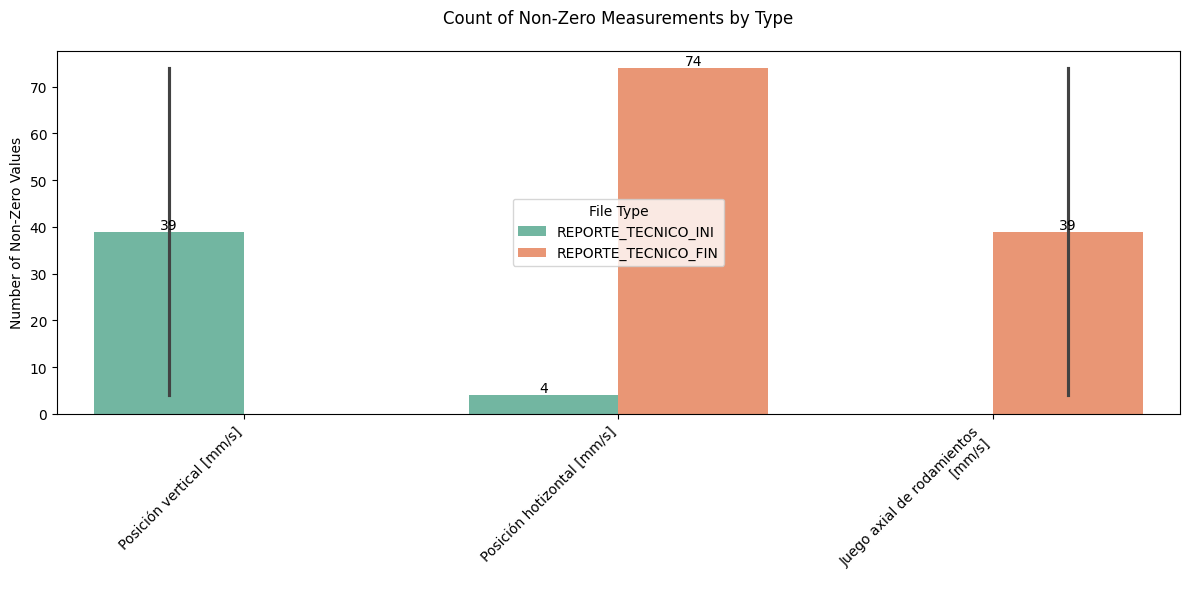

In [252]:
def plot_nonzero_counts(df):
    measure_cols = [
        "Posición vertical [mm/s]",
        "Posición hotizontal [mm/s]",
        "Juego axial de rodamientos\n[mm/s]",
    ]

    # Create a dictionary to store nonzero counts
    nonzero_counts = {}

    # Count nonzero values for each measurement and file type
    for col in measure_cols:
        nonzero_counts[col] = {
            "REPORTE_TECNICO_INI": df[df["file_type"] == "REPORTE_TECNICO_INI"][col]
            .astype(float)
            .ne(0)
            .sum(),
            "REPORTE_TECNICO_FIN": df[df["file_type"] == "REPORTE_TECNICO_FIN"][col]
            .astype(float)
            .ne(0)
            .sum(),
        }

    # Convert to DataFrame for plotting
    plot_data = pd.DataFrame(nonzero_counts).melt(
        var_name="Measurement", value_name="Count"
    )
    plot_data["File Type"] = [
        k for k in nonzero_counts[measure_cols[0]].keys() for _ in measure_cols
    ]

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Create grouped bar plot
    sns.barplot(
        data=plot_data, x="Measurement", y="Count", hue="File Type", palette="Set2"
    )

    # Customize appearance
    plt.xticks(rotation=45, ha="right")
    plt.title("Count of Non-Zero Measurements by Type", pad=20)
    plt.ylabel("Number of Non-Zero Values")
    plt.xlabel("")

    # Add value labels on top of bars
    for i in plt.gca().containers:
        plt.gca().bar_label(i)

    plt.tight_layout()
    return plt


plot_nonzero_counts(df)

In [263]:
def analyze_measurements(df):
    grouped = (
        df.groupby("file_type")
        .agg(
            {
                "Posición vertical [mm/s]": "mean",
                "Posición hotizontal [mm/s]": "mean",
                "Juego axial de rodamientos\n[mm/s]": "mean",
            }
        )
        .round(3)
    )

    return grouped


def analyze_and_plot_measurements(df, divide_by=None, paired=False):
    measure_cols = [
        "Posición vertical [mm/s]",
        "Posición hotizontal [mm/s]",
        "Juego axial de rodamientos\n[mm/s]",
    ]

    # Determine id_vars based on parameters
    id_vars = ["file_type"]
    if divide_by:
        id_vars.append(divide_by)

    melted_df = df.melt(
        id_vars=id_vars,
        value_vars=measure_cols,
        var_name="Measurement",
        value_name="Value",
    )

    def identify_outliers(group):
        q1 = group["Value"].quantile(0.25)
        q3 = group["Value"].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        return group[(group["Value"] >= lower_bound) & (group["Value"] <= upper_bound)]

    # Create two subplots
    if divide_by:
        fig, (ax1, ax2) = plt.subplots(
            2,
            len(df[divide_by].unique()),
            figsize=(12 * len(df[divide_by].unique()) // 2, 12),
        )
    else:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    def create_plots(data, ax, title_suffix):
        if divide_by:
            for idx, (name, group) in enumerate(data.groupby(divide_by)):
                current_ax = ax[idx] if isinstance(ax, np.ndarray) else ax

                if paired:
                    sns.boxplot(
                        data=group,
                        x="file_type",
                        y="Value",
                        hue="Measurement",
                        ax=current_ax,
                        palette="Set2",
                        showfliers=True,
                    )
                else:
                    sns.boxplot(
                        data=group,
                        x="Measurement",
                        y="Value",
                        hue="file_type",
                        ax=current_ax,
                        palette="Set2",
                        showfliers=True,
                    )

                sns.stripplot(
                    data=group,
                    x="Measurement" if not paired else "file_type",
                    y="Value",
                    hue="file_type" if not paired else "Measurement",
                    dodge=True,
                    alpha=0.3,
                    ax=current_ax,
                    size=4,
                )

                current_ax.set_title(f"{title_suffix} - {divide_by}: {name}")
                current_ax.set_xticklabels(
                    current_ax.get_xticklabels(), rotation=45, ha="right"
                )
        else:
            if paired:
                sns.boxplot(
                    data=data,
                    x="file_type",
                    y="Value",
                    hue="Measurement",
                    ax=ax,
                    palette="Set2",
                    showfliers=True,
                )
                sns.stripplot(
                    data=data,
                    x="file_type",
                    y="Value",
                    hue="Measurement",
                    dodge=True,
                    alpha=0.3,
                    ax=ax,
                    size=4,
                )
            else:
                sns.boxplot(
                    data=data,
                    x="Measurement",
                    y="Value",
                    hue="file_type",
                    ax=ax,
                    palette="Set2",
                    showfliers=True,
                )
                sns.stripplot(
                    data=data,
                    x="Measurement",
                    y="Value",
                    hue="file_type",
                    dodge=True,
                    alpha=0.3,
                    ax=ax,
                    size=4,
                )

            ax.set_title(title_suffix)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # Plot with outliers
    create_plots(melted_df, ax1, "Distribution with Outliers")

    # Plot without outliers
    cleaned_df = (
        melted_df.groupby("Measurement").apply(identify_outliers).reset_index(drop=True)
    )
    create_plots(cleaned_df, ax2, "Distribution without Outliers")

    # Print statistical summary
    print("\nOutlier Analysis:")
    for measurement in measure_cols:
        data = df[measurement].astype(float)
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        outliers = data[(data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))]
        print(f"\n{measurement}:")
        print(f"Total values: {len(data)}")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Outlier values: {outliers.values}")

    plt.tight_layout()
    return plt


df.loc[df["file_type"] == "REPORTE_TECNICO_FIN"].pipe(
    analyze_and_plot_measurements, divide_by="bajas_horas"
)

df.loc[df["file_type"] == "REPORTE_TECNICO_INI"].pipe(analyze_and_plot_measurements)

TypeError: analyze_and_plot_measurements() got an unexpected keyword argument 'divide_by'

In [264]:
df.head(3)

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,service_order,file_type,horometro,bajas_horas
0,Resultado vibraciones lado\nH1,0.0,0.0,0.0,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI,274.0,1
1,Resultado vibraciones lado\nH2,0.0,0.0,0.0,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI,274.0,1
2,Resultado vibraciones lado\nH1,0.0,0.0,0.0,no aplica,14103044.0,REPORTE_TECNICO_INI,20433.0,0


# Test de resistencia de aislación (500V)

In [217]:
table_name = table_names[1]
print(f"Tabla a analizar: {table_name}")
ini_df = compile_table(
    tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
)

df = ini_df.drop(columns=["file_path"])
df = df.pipe(add_extra_info, reso_df)


def normalize_measurements(df):
    mask_giga = df["Observaciones"].str.contains("Giga", case=False, na=False)
    mask_kilo = df["Observaciones"].str.contains("Kilo", case=False, na=False)

    df.loc[mask_giga, "Resultado del test [Mohm]"] *= 1000
    df.loc[mask_kilo, "Resultado del test [Mohm]"] /= 1000
    return df


df = df.pipe(normalize_measurements)


df.to_excel(f"DATA/RESO/SALIDA/{table_name}.xlsx", index=False)

Tabla a analizar: Test de resistencia de aislación (500V)


In [218]:
df

,measurement,Resultado del test [Mohm],Observaciones,service_order,file_type,HORÓMETRO
0,Bobinas del estator,71.5,Registro bajo lo establecido por KRCC,13010921,REPORTE_TECNICO_INI,274.0
1,Conmutador de la armadura,44.3,Registro bajo lo establecido por KRCC,13010921,REPORTE_TECNICO_INI,274.0
2,Bobinas del estator,692,Dentro de rango,14103044,REPORTE_TECNICO_INI,20433.0
3,Conmutador de la armadura,291,Dentro de rango,14103044,REPORTE_TECNICO_INI,20433.0
4,Bobinas del estator,4280,MEGA OHM,14116130,REPORTE_TECNICO_INI,8499.0
...,...,...,...,...,...,...
125,Conmutador de la armadura,0.73,Fuera de rango,14094512,REPORTE_TECNICO_INI,4388.0
126,Bobinas del estator,27.9,valores bajo rango,14112642,REPORTE_TECNICO_INI,11706.0
127,Conmutador de la armadura,42,valores bajo rango,14112642,REPORTE_TECNICO_INI,11706.0
128,Bobinas del estator,372,mega ohm,14138036,REPORTE_TECNICO_INI,17676.0


# Metrología de carbones

In [214]:
table_name = table_names[2]
print(f"Tabla a analizar: {table_name}")
ini_df = compile_table(
    tables=ini_tables, table_name=table_name, file_type="REPORTE_TECNICO_INI"
)
fin_df = compile_table(
    tables=fin_tables, table_name=table_name, file_type="REPORTE_TECNICO_FIN"
)

df = pd.concat([ini_df, fin_df]).drop(columns=["file_path"])
df = df.pipe(add_extra_info, reso_df)
df.to_excel(f"DATA/RESO/SALIDA/{table_name}.xlsx", index=False)

Tabla a analizar: Metrología de carbones


In [201]:
df

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,service_order,file_type
0,Resultado vibraciones lado\nH1,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI
1,Resultado vibraciones lado\nH2,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,REPORTE_TECNICO_INI
2,Resultado vibraciones lado\nH1,0,0,0,no aplica,14103044.0,REPORTE_TECNICO_INI
3,Resultado vibraciones lado\nH2,0,0,0,no aplica,14103044.0,REPORTE_TECNICO_INI
4,Resultado vibraciones lado\nH1,0,0,0,0,14135762.0,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...
69,Resultado vibraciones lado\nH2,0.111,0.378,0.31,Buenas condiciones,14137978.0,REPORTE_TECNICO_FIN
70,Resultado vibraciones lado\nH1,0.113,0.246,0.662,dentro de rango,14146766.0,REPORTE_TECNICO_FIN
71,Resultado vibraciones lado\nH2,0.092,0.28,0.627,dentro de rango,14146766.0,REPORTE_TECNICO_FIN
72,Resultado vibraciones lado\nH1,0.1,0.307,0.183,dentro de rango,14138036.0,REPORTE_TECNICO_FIN


In [194]:
ini_df

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,file_path,service_order,file_type
0,Resultado vibraciones lado\nH1,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,13010921,REPORTE_TECNICO_INI
1,Resultado vibraciones lado\nH2,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,13010921,REPORTE_TECNICO_INI
2,Resultado vibraciones lado\nH1,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14103044,REPORTE_TECNICO_INI
3,Resultado vibraciones lado\nH2,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14103044,REPORTE_TECNICO_INI
4,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14135762,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...,...
79,Resultado vibraciones lado\nH2,0,0,0,n/a,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14137978,REPORTE_TECNICO_INI
80,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14146766,REPORTE_TECNICO_INI
81,Resultado vibraciones lado\nH2,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14146766,REPORTE_TECNICO_INI
82,Resultado vibraciones lado\nH1,0,0,0,N/A,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14138036,REPORTE_TECNICO_INI


In [193]:
def preprocess_data(df):
    # Identify numeric columns (excluding service_order and categorical)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in ["service_order", ""]]

    # Identify non-numeric columns (excluding identifiers and file_type)
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    non_numeric_cols = [
        col for col in non_numeric_cols if col not in ["file_type", "", "measurement"]
    ]

    # Create unique column names by combining measurement type with column name
    df["unique_measurement"] = df["measurement"].str.strip()

    def reshape_to_wide(df, value_cols, agg_func="first"):
        wide_df = df.pivot_table(
            index=["service_order", "file_type"],
            columns="unique_measurement",
            values=value_cols,
            aggfunc=agg_func,
        ).reset_index()

        # Fix the column names - remove extra underscore for index columns
        wide_df.columns = [
            (
                col[0]
                if isinstance(col, tuple) and col[1] == ""
                else f"{col[1]}_{col[0]}".strip() if isinstance(col, tuple) else col
            )
            for col in wide_df.columns
        ]
        return wide_df

    # Reshape numeric and non-numeric columns separately
    wide_numeric = reshape_to_wide(df, numeric_cols)
    wide_non_numeric = reshape_to_wide(df, non_numeric_cols)

    # Combine the dataframes
    wide_df = pd.merge(
        wide_numeric, wide_non_numeric, on=["service_order", "file_type"]
    )
    wide_df = pd.merge(
        wide_df,
        reso_df[["service_order", "HORÓMETRO"]],
        how="left",
        on="service_order",
    )
    return wide_df


test_df = ini_df.drop(
    columns=["file_path"]
)  # pd.concat([ini_df, fin_df]).drop(columns=["file_path"])
test_df = preprocess_data(test_df)
test_df

,service_order,file_type,Resultado vibraciones lado\nH1_Juego axial de rodamientos\n[mm/s],Resultado vibraciones lado\nH2_Juego axial de rodamientos\n[mm/s],Resultado vibraciones lado\nH1_Observaciones,Resultado vibraciones lado\nH2_Observaciones,Resultado vibraciones lado\nH1_Posición hotizontal [mm/s],Resultado vibraciones lado\nH2_Posición hotizontal [mm/s],Resultado vibraciones lado\nH1_Posición vertical [mm/s],Resultado vibraciones lado\nH2_Posición vertical [mm/s],HORÓMETRO
0,13009560,REPORTE_TECNICO_INI,0,0,0,0,0,0,0,0,599.0
1,13010921,REPORTE_TECNICO_INI,0,0,"No se realizan pruebas\ndinámicas, armadura se...","No se realizan pruebas\ndinámicas, armadura se...",0,0,0,0,274.0
2,13011520,REPORTE_TECNICO_INI,0,0,N/A,N/A,0,0,0,0,3.0
3,14100895,REPORTE_TECNICO_INI,0,0,No aplica,No aplica,0,0,0,0,2577.0
4,14103044,REPORTE_TECNICO_INI,0,0,no aplica,no aplica,0,0,0,0,20433.0
5,14104180,REPORTE_TECNICO_INI,0,0,No aplica,No aplica,0,0,0,0,14671.0
6,14104276,REPORTE_TECNICO_INI,0,0,No aplica,No aplica,0,0,0,0,4513.0
7,14104447,REPORTE_TECNICO_INI,0,0,No aplica,No aplica,0,0,0,0,18580.0
8,14106529,REPORTE_TECNICO_INI,0,0,0,0,0,0,0,0,25301.0
9,14106530,REPORTE_TECNICO_INI,0,0,0,0,0,0,0,0,24456.0


In [171]:
ini_df.columns

Index(['measurement', 'Posición vertical [mm/s]', 'Posición hotizontal [mm/s]',
       'Juego axial de rodamientos\n[mm/s]', 'Observaciones', 'file_path',
       'service_order', 'HORÓMETRO', 'file_type'],
      dtype='object')

In [188]:
test_df

,service_order,file_type,HORÓMETRO_Resultado vibraciones lado\nH1,HORÓMETRO_Resultado vibraciones lado\nH2,Juego axial de rodamientos\n[mm/s]_Resultado vibraciones lado\nH1,Juego axial de rodamientos\n[mm/s]_Resultado vibraciones lado\nH2,Observaciones_Resultado vibraciones lado\nH1,Observaciones_Resultado vibraciones lado\nH2,Posición hotizontal [mm/s]_Resultado vibraciones lado\nH1,Posición hotizontal [mm/s]_Resultado vibraciones lado\nH2,Posición vertical [mm/s]_Resultado vibraciones lado\nH1,Posición vertical [mm/s]_Resultado vibraciones lado\nH2
0,13009560,REPORTE_TECNICO_INI,599.0,599.0,0,0,0,0,0,0,0,0
1,13010921,REPORTE_TECNICO_INI,274.0,274.0,0,0,"No se realizan pruebas\ndinámicas, armadura se...","No se realizan pruebas\ndinámicas, armadura se...",0,0,0,0
2,13011520,REPORTE_TECNICO_INI,3.0,3.0,0,0,N/A,N/A,0,0,0,0
3,14100895,REPORTE_TECNICO_INI,2577.0,2577.0,0,0,No aplica,No aplica,0,0,0,0
4,14103044,REPORTE_TECNICO_INI,20433.0,20433.0,0,0,no aplica,no aplica,0,0,0,0
5,14104180,REPORTE_TECNICO_INI,14671.0,14671.0,0,0,No aplica,No aplica,0,0,0,0
6,14104276,REPORTE_TECNICO_INI,4513.0,4513.0,0,0,No aplica,No aplica,0,0,0,0
7,14104447,REPORTE_TECNICO_INI,18580.0,18580.0,0,0,No aplica,No aplica,0,0,0,0
8,14106529,REPORTE_TECNICO_INI,25301.0,25301.0,0,0,0,0,0,0,0,0
9,14106530,REPORTE_TECNICO_INI,24456.0,24456.0,0,0,0,0,0,0,0,0


In [163]:
ini_df

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,file_path,service_order,HORÓMETRO,file_type
0,Resultado vibraciones lado\nH1,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,13010921,274.0,REPORTE_TECNICO_INI
1,Resultado vibraciones lado\nH2,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,13010921,274.0,REPORTE_TECNICO_INI
2,Resultado vibraciones lado\nH1,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14103044,20433.0,REPORTE_TECNICO_INI
3,Resultado vibraciones lado\nH2,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14103044,20433.0,REPORTE_TECNICO_INI
4,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14135762,6103.0,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...,...,...
79,Resultado vibraciones lado\nH2,0,0,0,n/a,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14137978,24180.0,REPORTE_TECNICO_INI
80,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14146766,4490.0,REPORTE_TECNICO_INI
81,Resultado vibraciones lado\nH2,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14146766,4490.0,REPORTE_TECNICO_INI
82,Resultado vibraciones lado\nH1,0,0,0,N/A,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14138036,17676.0,REPORTE_TECNICO_INI


In [112]:
pd.concat([ini_df, fin_df]).drop(columns=["file_path"])

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,service_order,HORÓMETRO,file_type
0,Resultado vibraciones lado\nH1,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,274.0,REPORTE_TECNICO_INI
1,Resultado vibraciones lado\nH2,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",13010921.0,274.0,REPORTE_TECNICO_INI
2,Resultado vibraciones lado\nH1,0,0,0,no aplica,14103044.0,20433.0,REPORTE_TECNICO_INI
3,Resultado vibraciones lado\nH2,0,0,0,no aplica,14103044.0,20433.0,REPORTE_TECNICO_INI
4,Resultado vibraciones lado\nH1,0,0,0,0,14135762.0,6103.0,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...,...
69,Resultado vibraciones lado\nH2,0.111,0.378,0.31,Buenas condiciones,14137978.0,24180.0,REPORTE_TECNICO_FIN
70,Resultado vibraciones lado\nH1,0.113,0.246,0.662,dentro de rango,14146766.0,4490.0,REPORTE_TECNICO_FIN
71,Resultado vibraciones lado\nH2,0.092,0.28,0.627,dentro de rango,14146766.0,4490.0,REPORTE_TECNICO_FIN
72,Resultado vibraciones lado\nH1,0.1,0.307,0.183,dentro de rango,14138036.0,17676.0,REPORTE_TECNICO_FIN


In [108]:
ini_df

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,file_path,service_order,HORÓMETRO,file_type
0,Resultado vibraciones lado\nH1,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,13010921,274.0,REPORTE_TECNICO_INI
1,Resultado vibraciones lado\nH2,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,13010921,274.0,REPORTE_TECNICO_INI
2,Resultado vibraciones lado\nH1,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14103044,20433.0,REPORTE_TECNICO_INI
3,Resultado vibraciones lado\nH2,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14103044,20433.0,REPORTE_TECNICO_INI
4,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14135762,6103.0,REPORTE_TECNICO_INI
...,...,...,...,...,...,...,...,...,...
79,Resultado vibraciones lado\nH2,0,0,0,n/a,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14137978,24180.0,REPORTE_TECNICO_INI
80,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14146766,4490.0,REPORTE_TECNICO_INI
81,Resultado vibraciones lado\nH2,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14146766,4490.0,REPORTE_TECNICO_INI
82,Resultado vibraciones lado\nH1,0,0,0,N/A,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,14138036,17676.0,REPORTE_TECNICO_INI


In [105]:
fin_df["Posición hotizontal [mm/s]"]

0     0.466
1     0.382
2     0.157
3     0.204
4     0.365
      ...  
69    0.378
70    0.246
71     0.28
72    0.307
73     0.54
Name: Posición hotizontal [mm/s], Length: 74, dtype: object

In [82]:
df

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,file_path
0,Resultado vibraciones lado\nH1,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...
1,Resultado vibraciones lado\nH2,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...
0,Resultado vibraciones lado\nH1,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
1,Resultado vibraciones lado\nH2,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
0,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
...,...,...,...,...,...,...
1,Resultado vibraciones lado\nH2,0,0,0,n/a,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
0,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
1,Resultado vibraciones lado\nH2,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
0,Resultado vibraciones lado\nH1,0,0,0,N/A,/home/cecilvega/PycharmProjects/kohub/DATA/RES...


In [68]:
reso_df

,changeout_date,component_serial,component_hours,equipo,USO,bajas_horas,service_order,faena,reception_date,REPORTE_TECNICO_INI,REPORTE_TECNICO_FIN
0,2021-03-15,EE04070186,274.0,878.0,0.01370,1.0,13010921,MINERA ESCONDIDA,2021-04-06 00:00:00.000,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
1,NaT,EE04070186,NaN,NaN,NaN,NaN,14067705,CODELCO-CHILE RADOMIRO TOMIC,2015-05-25 11:20:09.930,NaN,NaN
2,NaT,EE04070186,NaN,NaN,NaN,NaN,14103044,CODELCO-CHILE RADOMIRO TOMIC,2019-04-29 00:00:00.000,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
3,NaT,EE04070186,NaN,NaN,NaN,NaN,14116130,MINERA ESCONDIDA,2020-11-27 00:00:00.000,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
4,NaT,EE04070186,NaN,NaN,NaN,NaN,14135762,MINERA ESCONDIDA,2023-04-10 00:00:00.000,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
...,...,...,...,...,...,...,...,...,...,...,...
182,NaT,EN12090076,NaN,NaN,NaN,NaN,14139785,MINERA ESCONDIDA,2023-10-13 00:00:00.000,NaN,NaN
183,NaT,EN12100083,NaN,NaN,NaN,NaN,14079198,SIERRA GORDA,2016-09-01 09:05:29.823,NaN,NaN
184,2020-11-04,EN12100083,25181.0,866.0,1.25905,0.0,14115857,MINERA ESCONDIDA,2020-11-13 00:00:00.000,NaN,NaN
185,NaT,EN12100083,NaN,NaN,NaN,NaN,14132243,SIERRA GORDA,2022-11-10 00:00:00.000,NaN,NaN


In [71]:
pd.merge(df, reso_df, how="left", left_on="file_path", right_on="REPORTE_TECNICO_INI")

,measurement,Posición vertical [mm/s],Posición hotizontal [mm/s],Juego axial de rodamientos\n[mm/s],Observaciones,file_path,changeout_date,component_serial,component_hours,equipo,USO,bajas_horas,service_order,faena,reception_date,REPORTE_TECNICO_INI,REPORTE_TECNICO_FIN
0,Resultado vibraciones lado\nH1,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,2021-03-15,EE04070186,274.0,878.0,0.0137,1.0,13010921,MINERA ESCONDIDA,2021-04-06,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
1,Resultado vibraciones lado\nH2,0,0,0,"No se realizan pruebas\ndinámicas, armadura se...",/home/cecilvega/PycharmProjects/kohub/DATA/RES...,2021-03-15,EE04070186,274.0,878.0,0.0137,1.0,13010921,MINERA ESCONDIDA,2021-04-06,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
2,Resultado vibraciones lado\nH1,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,NaT,EE04070186,NaN,NaN,NaN,1.0,14103044,CODELCO-CHILE RADOMIRO TOMIC,2019-04-29,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
3,Resultado vibraciones lado\nH2,0,0,0,no aplica,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,NaT,EE04070186,NaN,NaN,NaN,1.0,14103044,CODELCO-CHILE RADOMIRO TOMIC,2019-04-29,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
4,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,NaT,EE04070186,NaN,NaN,NaN,1.0,14135762,MINERA ESCONDIDA,2023-04-10,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Resultado vibraciones lado\nH2,0,0,0,n/a,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,NaT,EN12040115,NaN,NaN,NaN,NaN,14137978,NaN,NaT,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
80,Resultado vibraciones lado\nH1,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,NaT,EN12040115,NaN,NaN,NaN,NaN,14146766,NaN,NaT,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
81,Resultado vibraciones lado\nH2,0,0,0,0,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,NaT,EN12040115,NaN,NaN,NaN,NaN,14146766,NaN,NaT,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...
82,Resultado vibraciones lado\nH1,0,0,0,N/A,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,NaT,EN12090007,NaN,NaN,NaN,1.0,14138036,MINERA ESCONDIDA,2023-07-25,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,/home/cecilvega/PycharmProjects/kohub/DATA/RES...


In [ ]:
tables[11]

# Test de resistencia de aislación (500V)

In [133]:
extract_table_info()


def normalize_measurements(df):
    mask_giga = df["Observaciones"].str.contains("Giga", case=False, na=False)
    mask_kilo = df["Observaciones"].str.contains("Kilo", case=False, na=False)

    df.loc[mask_giga, "Resultado del test [Mohm]"] *= 1000
    df.loc[mask_kilo, "Resultado del test [Mohm]"] /= 1000
    return df


df = df.pipe(normalize_measurements)


def split_df_by_column(df, column_name):
    return {key: group for key, group in df.groupby(column_name)}


df

,changeout_date,component_serial,component_hours,equipo,USO,SIN_INFORMES,bajas_horas,service_order,faena,reception_date,file_path,Column_0,Resultado del test [Mohm],Observaciones,table_name
0,2024-09-30,EE13101129,558.0,855,0.02790,0,1,14146391,MINERA ESCONDIDA,2024-07-09,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Bobinas del estator,9850.000,MEGA OHM,2.- Test de resistencia de aislación (500V)
1,2024-09-30,EE13101129,558.0,855,0.02790,0,1,14146391,MINERA ESCONDIDA,2024-07-09,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Conmutador de la armadura,19800.000,MEGA OHM,2.- Test de resistencia de aislación (500V)
2,2024-09-30,EE13101129,558.0,855,0.02790,0,1,14098373,MINERA ESCONDIDA,2018-11-05,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Bobinas del estator,520.000,dentro de rango.,2.- Test de resistencia de aislación (500V)
3,2024-09-30,EE13101129,558.0,855,0.02790,0,1,14098373,MINERA ESCONDIDA,2018-11-05,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Conmutador de la armadura,2310.000,dentro de rango.,2.- Test de resistencia de aislación (500V)
4,2024-09-30,EE13101129,558.0,855,0.02790,0,1,14113828,MINERA ESCONDIDA,2020-08-10,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Bobinas del estator,76.000,Bajo el rango,2.- Test de resistencia de aislación (500V)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019-09-12,EE14070949,25301.0,876,1.26505,0,0,14140684,MINERA ESCONDIDA,2023-11-20,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Conmutador de la armadura,1.462,Mega ohm,2.- Test de resistencia de aislación (500V)
140,2019-03-14,EE12040115,599.0,862,0.02995,0,1,13009560,MINERA ESCONDIDA,2019-04-16,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Bobinas del estator,5630000.000,Test eléctricos antes de desarme,2.- Test de resistencia de aislación (500V)
141,2019-03-14,EE12040115,599.0,862,0.02995,0,1,13009560,MINERA ESCONDIDA,2019-04-16,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Conmutador de la armadura,542000.000,Test eléctricos antes de desarme,2.- Test de resistencia de aislación (500V)
142,2019-03-14,EE12040115,599.0,862,0.02995,0,1,14099121,MINERA ESPERANZA,2018-12-05,/home/cecilvega/PycharmProjects/kohub/DATA/RES...,Bobinas del estator,44.700,fuera de rango.,2.- Test de resistencia de aislación (500V)


In [129]:
df.loc[df["Column_0"] == "Bobinas del estator"].columns

Index(['changeout_date', 'component_serial', 'component_hours', 'equipo',
       'USO', 'SIN_INFORMES', 'bajas_horas', 'service_order', 'faena',
       'reception_date', 'file_path', 'Column_0', 'Resultado del test [Mohm]',
       'Observaciones', 'table_name'],
      dtype='object')